# Methods for Data Science: Course Work 1

In [149]:
# import packages
import pandas as pd
import numpy as np

## Task 1:  Regression (50 marks)



#### 1.1 Linear regression (8 marks)  

I will first import and clean the data set, and then provide a scatter plot to visualise the relationships between predictors. 

In [1114]:
# import data
airfoil_noise_samples = pd.read_csv("airfoil_noise_samples.csv", decimal=",")
airfoil_noise_test = pd.read_csv("airfoil_noise_test.csv", decimal=",")
# check the data frame
airfoil_noise_samples.head()

Frequency               Angle        Displacement  \
0  2175.611424157345  15.138865454917728  21.075119392573132   
1  2962.923620146981  13.400893363434964   13.20088913619566   
2  4430.810842873842  2.1645991884042726  13.959536148353086   
3  4939.695644816673   13.85768228722421   18.20379273238007   
4  2193.979785010471   9.298757446999714  11.007713108889968   

           Chord length           Velocity              Thickness  \
0   0.08819424483998771  66.76440124185409    0.04477066770108877   
1  0.048461910727628496  78.22190337040416     0.0110410219990818   
2   0.22674271428711074  57.05320076750986   0.011499141077893932   
3   0.02170484709264506  23.89637702512826   0.021475173008708166   
4   0.05273665913023956  38.91703407548024  0.0017407655965449103   

       Sound Pressure  
0  122.36521516923828  
1  129.29623628505382  
2   121.8273803814648  
3  114.99813188653854  
4  125.63964141611963

In [1116]:
airfoil_noise_samples.dtypes

Frequency         object
Angle             object
Displacement      object
Chord length      object
Velocity          object
Thickness         object
Sound Pressure    object
dtype: object

Need to change dtypes

In [1117]:
airfoil_noise_samples = airfoil_noise_samples.astype(float)
airfoil_noise_test = airfoil_noise_test.astype(float)

In [1118]:
print(airfoil_noise_samples.shape)
print(airfoil_noise_test.shape)

(3890, 7)
(973, 7)


In [1119]:
# check duplicates
sum(airfoil_noise_samples.duplicated())

0

In [1120]:
# check NaNs
print(diabetes_samples.isnull().values.any())
print(diabetes_test.isnull().values.any())

False
False


Now we extract the column `Sound Pressure` to be the target, and fill the rest of data into a matrix

In [1121]:
y_train = airfoil_noise_samples.loc[:, 'Sound Pressure']
X_train = airfoil_noise_samples.iloc[:, :-1]

y_test = airfoil_noise_test.loc[:, 'Sound Pressure']
X_test = airfoil_noise_test.iloc[:, :-1]

print(f'number of predictors = {X_test.shape[1]}')
X_test.head()

number of predictors = 6


Frequency      Angle  Displacement  Chord length   Velocity  Thickness
0  1143.654418  12.783087     15.277127      0.110389  46.089548   0.024076
1   619.208992   4.460285     16.198696      0.284357  36.728360   0.004000
2   646.114737   2.521952      7.533605      0.072292  59.498237   0.003590
3  1246.777461   8.438129     12.396435      0.034411  47.557277   0.002407
4   286.200927  12.238350     20.877161      0.082437  72.786590   0.036883

In [1122]:
# convert to arrays
X_train = X_train.to_numpy(dtype='float64')
y_train = y_train.to_numpy(dtype='float64')
X_test = X_test.to_numpy(dtype='float64')
y_test = y_test.to_numpy(dtype='float64')

In [1123]:
# check for inf
print(np.isinf(X_train).any())
print(np.isinf(X_test).any())

False
False


For regressions, we need to check correlations between the 6 predictors, but we first standardise all predictors so that they are on the same scale

In [1033]:
def standardise(X):
    mu = np.mean(X, 0)
    sigma = np.std(X, 0)
    X_std = (X - mu) / sigma 
    return X_std

Transform the test set in the same way as train set to ensure consistency. 

In [1124]:
X_train_std = standardise(X_train)
X_test_std = (X_test - np.mean(X.train, 0)) / np.std(X_train, 0)

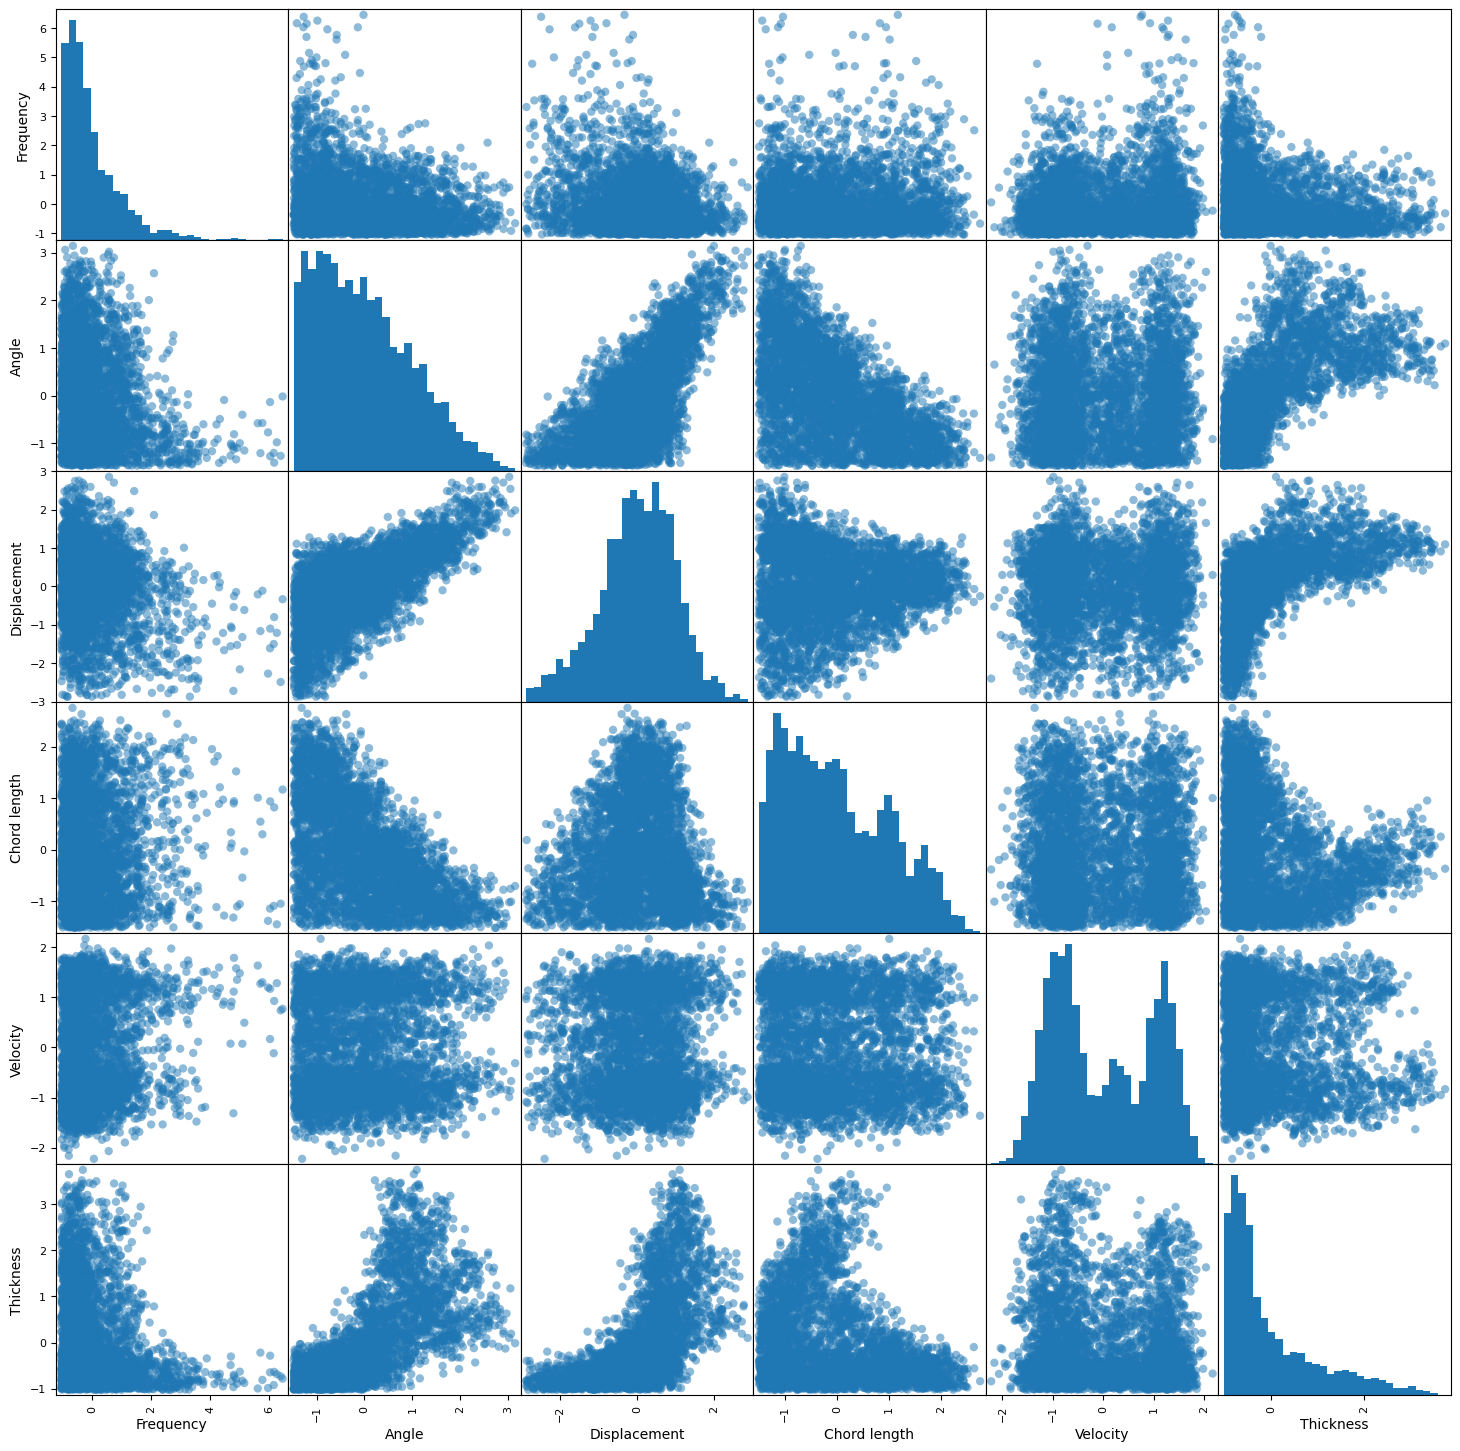

In [1035]:
# scatter plots between each pair of predictors
grr = pd.plotting.scatter_matrix(pd.DataFrame(X_train_std, columns = airfoil_noise_samples.columns[:-1]), marker="o", figsize=(18, 18), hist_kwds={'bins': 30}, alpha=.5)

There could be some weak positive correlation between angle, displacement and thickness. And weak negative correlation between angle and chord length.

1.1.1

For convenience, we construct the augmented matrix $\overline{X} = [X | 1]$ (i.e. adding a column of 1s), and build the augmented coefficients $\overline{\beta} = [\beta | \beta_0]$ so that the loss function now becomes
$$L(\overline{\beta}) = \frac{1}{2N} \|y - \overline{X}\overline{\beta} \|^2$$
by lecture, the optimal solution is 
$$\overline{\beta}^* = (\overline{X}^T \overline{X})^{-1} \overline{X}^T y$$

First define a function that computes $\beta^*$ 

In [584]:
def beta_estimate(X, y):
    """
    Return the optimal solution for y = beta X + beta_0 by minimising the loss function
    
    Arguments
    X: (N, p+1) np array, augmented predictor matrix
    y: (N, ) np array, targets variable of X
    
    returns hat_beta: (p+1,) np array, coefficients that minimises loss function
    """
    
    N, D = X.shape
    hat_beta = np.linalg.inv(np.dot(X.T, X)) @ X.T.dot(y)
    return hat_beta

Add intercept to X (the standardised version) 

In [1126]:
X_train_b = np.c_[X_train_std, np.ones(X_train_std.shape[0]).reshape(-1, 1)]
X_test_b = np.c_[X_test_std, np.ones(X_test_std.shape[0]).reshape(-1, 1)]

In [1127]:
beta_train = beta_estimate(X_train_b, y_train)

In [1128]:
beta_train

array([-3.57549693e+00,  8.34478004e-01, -3.92864721e+00, -7.83341979e-02,
        1.72495668e+00, -1.35633979e-02,  1.23970283e+02])

The intercept is about $124$, which is an estimate of the mean sound pressure. From the magnitude of other $\beta_i$ it seems that the fourth and sixth predictors(chord length, thickness) have less effects on sound pressure. 

Now we find the predicted sound pressure on training set and calculate MSE, $R^2$ score. 

In [1129]:
y_train_preds = X_train_b @ beta_train

# compute in-sample scores (on the train set)
MSE_in_lr = np.mean((y_train_preds - y_train) ** 2)
R_squared_in_lr = 1 - np.sum((y_train_preds - y_train) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2)

print("---- Scores for Ordinary Least Square----")
print(f"MSE (in-sample) = {MSE_in_lr}")
print(f"R^2 score (in-sample) = {R_squared_in_lr}")

---- Scores for Ordinary Least Square----
MSE (in-sample) = 1.8755566396402015
R^2 score (in-sample) = 0.9177343977263077


$R^2$ is close to $1$, meaning the training data points are close to the regression line. And the MSE is smaller than $2$, indicating a good prediction is obtained for sound pressure in the training set

1.1.2

Apply the model on the test set, and find the scores

In [1130]:
# apply the model to test data
y_test_preds = X_test_b @ beta_train

# compute out of sample scores (on the train set)
MSE_out_lr = np.mean((y_test_preds - y_test) ** 2)
R_squared_out_lr = 1 - np.sum((y_test_preds - y_test) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)

print("---- Scores for Ordinary Least Square----")
print(f"MSE (out of sample) = {MSE_out_lr}")
print(f"R^2 score (out of sample) = {R_squared_out_lr}")

---- Scores for Ordinary Least Square----
MSE (out of sample) = 2.0043755955825
R^2 score (out of sample) = 0.9073938520660666


The out-of-sample MSE is slightly higher than that of in-sample MSE, and the $R^2$ score is about 0.01 higher for the training set. The similarities between scores for training and testing set means that the model can be generalised, there is no significant over-fitting or under-fitting. Since both $R^2$ scores are close to $0.9$, the model performance is satisfactory.

#### 1.2 Lasso regression (12 marks) 

1.2.1

Use gradient descent to minimise the LASSO loss function. Note the function $\|\beta\|_1$ is not differentiable at $0$, so if $\beta_i = 0$, set the partial derivative to $0$ for gradient descent. <br>

Therefore, for $i = 1, \cdots, p$, the partial derivatives we construct is 
$$\frac{\partial }{\partial \beta_i} \|\beta\|_1 = \begin{cases} \frac{\beta_i}{|\beta_i|}, & \beta_i \neq 0 \\ 0, & \beta_i = 0 \end{cases} = \text{sign}(\beta_i)$$
where 
$$\text{sign}(x) := \begin{cases} 1, & x > 0 \\ -1, & x < 0 \\ 0 & x = 0\end{cases}$$

The gradient of the first term (in augmented form) is 
$$\frac{\partial }{\partial \hat{\beta}} \left(\frac{1}{2N} \|\boldsymbol{y} - \hat{X} \hat{\beta} \|^2 \right) = \frac{1}{N} \hat{X}^T(\hat{X} \hat{\beta} - \boldsymbol{y}) $$

The learning rate $l_r$ is set to $k / N_{\text{iterations}}$ where $k$ will be tuned later. The initial $\beta$ is set to $\boldsymbol{0}$, and initial $\beta_0$ is $\overline{y}$. (sample mean of sound pressure) Because the formuale is 
$$\boldsymbol{y} = X\beta + \beta_0 + \varepsilon_i \quad \varepsilon_i \sim N(\boldsymbol{0}, \Sigma)$$
so $E(\boldsymbol{y}) = E(X) \beta + \beta_0 + E(\varepsilon_i)$ by linearity of expectation. But we have standardised $X$ so $E(X) = \boldsymbol{0}$ and $E(\varepsilon_i) = \boldsymbol{0}$. Therefore, $E(\boldsymbol{y})  = \beta_0$. 

The stopping criteria is the difference between costs of two iterations, i.e. $\left| L_{\text{LASSO}}(\beta^{(i+1)}) - L_{\text{LASSO}}(\beta^{(i)}) \right|$  

In [1046]:
def gd_lasso(X, y, k, max_iterations=5000, stop_criterion=1e-2, regul_strength=1e3, max_it_warn=True):
    """
    Perform gradient descent on Lasso loss function
    
    :parma X: (N, p+1) numpy array, the augmented data matrix
    :param y: (N,) numpy array, the target variable of X
    :param k: learning rate coefficient, lr = k / n_iterations
    :param max_iterations: int, maximum iterations allowed
    :param stop_criterion: float, stop the algorithm when 
        the percentage change in cost between two iterations < stop_criterion
    :param regul_strength: the parameter lambda, default 1e3
    :param max_it_warn: boolean, throw maximum iteration reached warning if True
    
    :return beta: the optimal solution beta w obtained by GD
    :return iteration: number of iterations until convergence
    """
    N, P = X.shape
    # initialise beta as zero 
    beta = np.zeros(P)
    # initialise beta0 as mean of y
    beta[-1] = np.mean(y)

    nth = 0
    # initialise starting cost as infinity
    # used to store cost of previous iteration, for checking stopping criteria 
    prev_cost = np.inf
  
    # gradient descent
    for iteration in range(1, max_iterations):
        learning_rate = k / iteration
        
        # find the gradient of first term
        ascent = X.T @ (X @ beta - y) / N
        # deal with derivative of |beta|_1
        ascent[:-1] += regul_strength * np.sign(beta[:-1])
        
        # update beta
        np.subtract(beta, learning_rate * ascent, out=beta)
        
        # convergence check on every 2^n'th iteration
        if iteration==2**nth or iteration==max_iterations-1:
            nth += 1
            # compute the lasso cost
            cost = np.linalg.norm(y - X @ beta) ** 2 / (2 * N) + regul_strength * np.linalg.norm(beta[:-1], 1)
            
            # stop criterion
            if np.abs(cost - prev_cost) < stop_criterion:
                return beta, iteration
            
            prev_cost = cost
        
    if max_it_warn: 
        print(f"maximum iterations reached, iteration number = {iteration}")
    return beta, max_iterations

Perform 5-fold cross validation on $\lambda = \{10^{-6}, 10^{-2}, 10^{-1}, \cdots, 10^2 \}$. Such exponential variation of $\lambda$ is chosen because it is a coefficient multiplied to 1-norm, exponential variation can fully investigate effect of $\lambda$ on regularisation. The score is chosen as average MSE of validation set among all folds

In [759]:
def cross_val_lasso(X, y, num_folds, regul_strength, k):
    """
    Perform T-fold cross-validation on LASSO regression given a choice of hyper-parameters
    
    Arguments 
        X, y: np arrays, X is the matrix of predictors and y contains the target variable
        num_folds (int): number of folds for cross-validation
        regul_strength: the lambda parameter for this cross-validation
        k: the learning rate coefficient
            learning rate is k / niteration
        
    Returns:
        train_MSE (float): mean MSE on training set among all folds
        val_MSE (float): mean MSE on validation set among all folds
    """
    
    folds = cross_val_split(X.shape[0], num_folds)
    
    # stores the MSE
    train_scores = []
    val_scores = []
    
    for i in range(len(folds)):

        val_indices = folds[i]
        # define the training set: complement of validation set
        train_indices = list(set(range(X.shape[0])) - set(val_indices))

        X_train = X.take(train_indices, axis=0)
        y_train = y[train_indices]
    
        # define the validation set
        X_val = X.take(val_indices, axis=0)
        y_val = y[val_indices]

        # train the model
        beta, _ = gd_lasso(X_train, y_train, k, regul_strength=regul_strength, max_it_warn=False)
    
        # calculate scores and store them
        train_score = np.mean((y_train - X_train @ beta) ** 2)
        val_score = np.mean((y_val - X_val @ beta) ** 2)

        train_scores.append(train_score)
        val_scores.append(val_score)

    train_MSE = np.mean(train_scores)
    val_MSE = np.mean(val_scores)
    return train_MSE, val_MSE

Write a function for grid seach

In [796]:
def grid_search_lasso(X, y, num_folds, k):
    """
    Perform grid search for: 
        lambda = 10 from power -6 to 2
    on the LASSO regression

    Arguments 
        X, y: np arrays, X is the matrix of predictors and y contains the target variable
        num_folds (int): number of folds for cross-validation
        k: learning rate coefficient
            learning rate is k / niteration
        
    Returns:
        best_lambda (float): the best lambda obtained from grid search
        ls: list of lambda used for grid search
        mse_l: list average MSE on validation sets 
    """
    
    ls = [10.0 ** (exp) for exp in np.arange(-6, 3)]
    mse_l = []
    
    # set initial mse to infinity, and search for the lambda giving lowest MSE during iterations
    best_mse = np.inf
    best_lambda = None
    
    for l in ls:
        _, val_MSE = cross_val_lasso(X, y, num_folds, l, k)
        mse_l.append(val_MSE)
        
        if val_MSE < best_mse:
            best_mse = val_MSE
            best_lambda = l
    
    return best_lambda, ls, mse_l

Perform grid search for $\lambda$ with learning rate coefficient $k = 1$ 

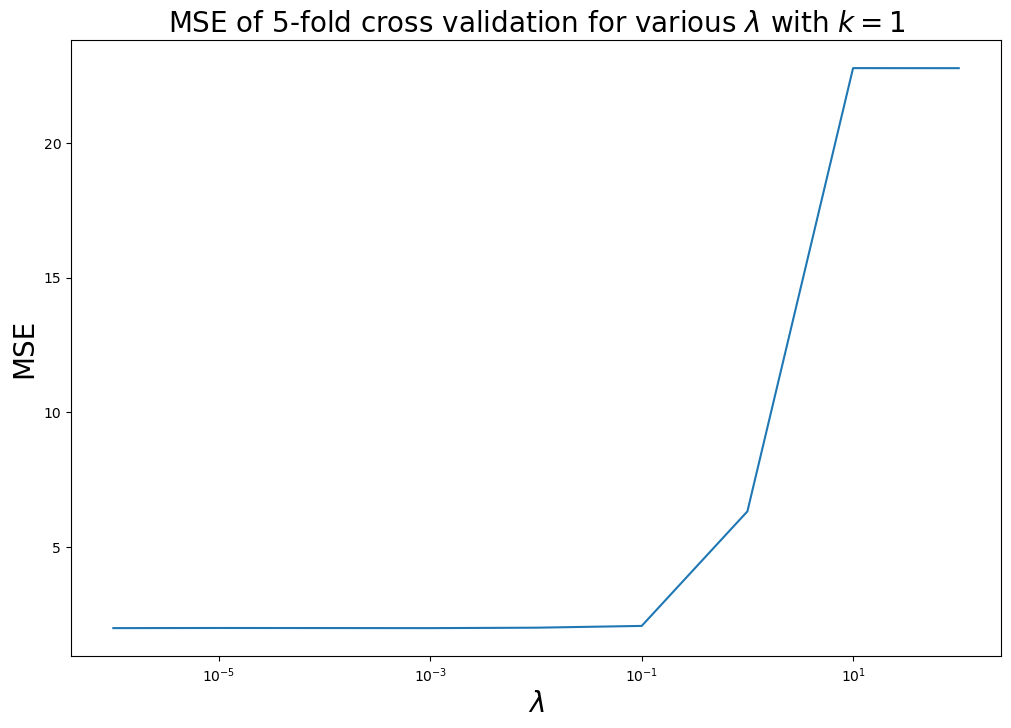

In [800]:
plt.figure(figsize=(12,8))
plt.title(r'MSE of 5-fold cross validation for various $\lambda$ with $k = 1$', size=20)
plt.xscale('log')
plt.xlabel(r'$\lambda$', size=20)
plt.ylabel('MSE', size=20)
best_l, ls, mse_l = grid_search_lasso(X_train_b, y_train, 5, k=1)
plt.plot(ls, mse_l)

Now try $k = 0.01$ 

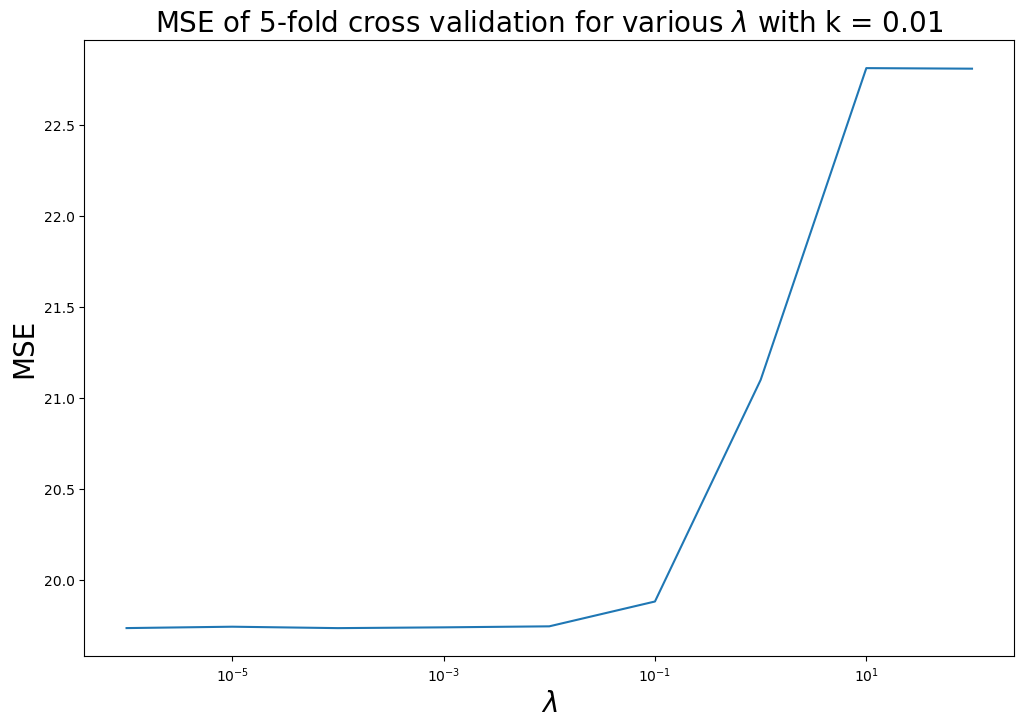

In [801]:
plt.figure(figsize=(12,8))
plt.title(r'MSE of 5-fold cross validation for various $\lambda$ with k = 0.01', size=20)
plt.xscale('log')
plt.xlabel(r'$\lambda$', size=20)
plt.ylabel('MSE', size=20)
best_l_2, _, mse_l_2 = grid_search_lasso(X_train_b, y_train, 5, k=1e-2)
plt.plot(ls, mse_l_2)

$k= 0.01$ seems to give higher MSE (though the trend of MSE with $\lambda$ is almost the same). Try $k = 10$

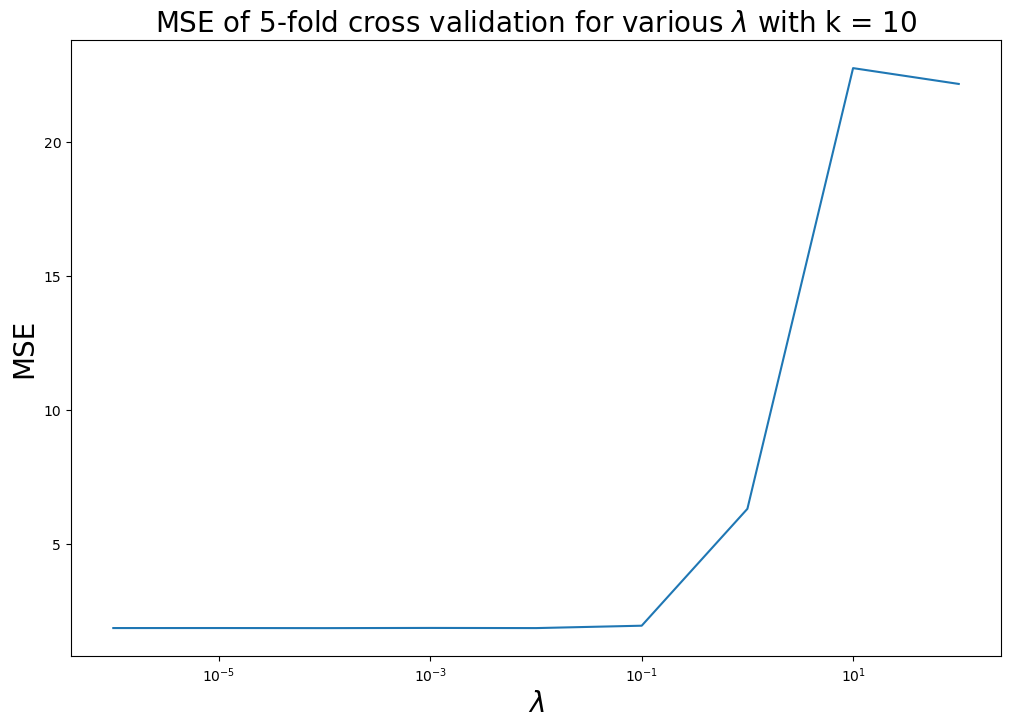

In [809]:
plt.figure(figsize=(12,8))
plt.title(r'MSE of 5-fold cross validation for various $\lambda$ with k = 10', size=20)
plt.xscale('log')
plt.xlabel(r'$\lambda$', size=20)
plt.ylabel('MSE', size=20)
best_l_3, _, mse_l_3 = grid_search_lasso(X_train_b, y_train, 5, k=10)
plt.plot(ls, mse_l_3)

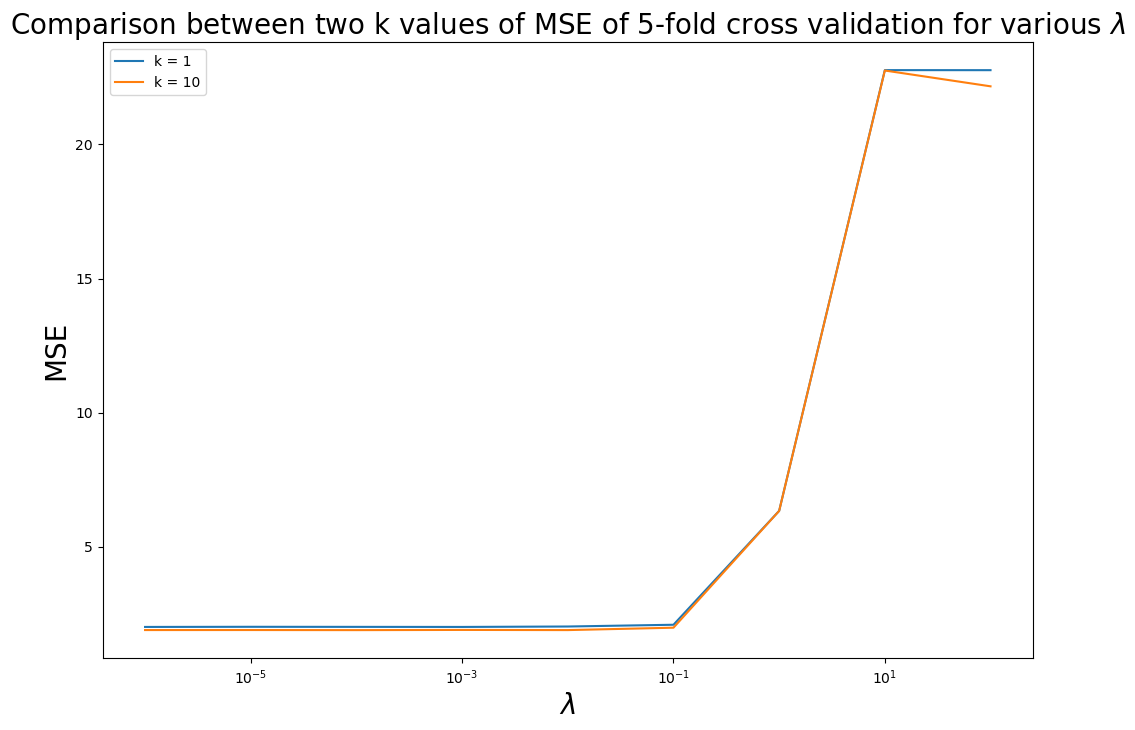

In [896]:
plt.figure(figsize=(12,8))
plt.title(r'Comparison between two k values of MSE of 5-fold cross validation for various $\lambda$', size=20)
plt.xscale('log')
plt.xlabel(r'$\lambda$', size=20)
plt.ylabel('MSE', size=20)
plt.plot(ls, mse_l, label='k = 1')
plt.plot(ls, mse_l_3, label='k = 10')
plt.legend()

It seems that the $k=10$ gives slightly better performance, and it is much faster (because it corresponds to larger step size). So $k$ will be fixed to $10$ from now on. The $\lambda$ giving the best value can be found by taking the lowest value on the graph. The codes for finding the best $\lambda$ value are already implemented in the function `grid_search_lasso`. The best value is printed below.

In [812]:
best_l_3

0.0001

1.2.2

In this section, I will plot each value of $\beta_i$ as $\lambda$ varies and see how the regularisation strength affects each coefficient individually. 

In [930]:
def visualise_beta(X, y, k):
    """
    Visualise values of beta for one chosen training/validation split 
    
    Arguments 
        X, y: np arrays, X is the matrix of predictors and y contains the target variable
        k: learning rate coefficient
            learning rate is k / niteration
    """
    
    ls = [10.0 ** (exp) for exp in np.arange(-5, 3)]
    
    # create a matrix to store beta
    beta_mat = np.zeros((X.shape[1], len(ls)))
    
    ind = 0
    for l in ls:
        folds = cross_val_split(X.shape[0], 5)
        # only use the first fold
        val_indices = folds[0]
        # define the training set: complement of validation set
        train_indices = list(set(range(X.shape[0])) - set(val_indices))

        X_train = X.take(train_indices, axis=0)
        y_train = y[train_indices]
    
        # define the validation set
        X_val = X.take(val_indices, axis=0)
        y_val = y[val_indices]

        # train the model
        beta, _ = gd_lasso(X_train, y_train, k, regul_strength=l, max_it_warn=False)
        beta_mat[:, ind] = beta
        
        ind += 1
    
    # store column names 
    names = airfoil_noise_samples.columns.values[:-1]
    
    plt.figure(figsize=(12,8))
    plt.title(r'$\beta$ values of one fixed training/validation split for various $\lambda$', size=20)
    plt.xscale('log')
    plt.xlabel(r'$\lambda$', size=20)
    plt.ylabel(r'$\beta$ values', size=20)
    for i in range(len(names)):
        plt.plot(ls, beta_mat[i,:], label=f'{names[i]}')
    plt.legend()
    plt.show()
    
    # plot beta0 individually (because it is on a different scale)
    
    plt.figure(figsize=(12,8))
    plt.title(r'$\beta_0$ values of one fixed training/validation split for various $\lambda$', size=20)
    plt.xscale('log')
    plt.ylim(123, 125)
    plt.xlabel(r'$\lambda$', size=20)
    plt.ylabel(r'$\beta_0$ values', size=20)
    plt.plot(ls, beta_mat[-1,:])
    plt.show()

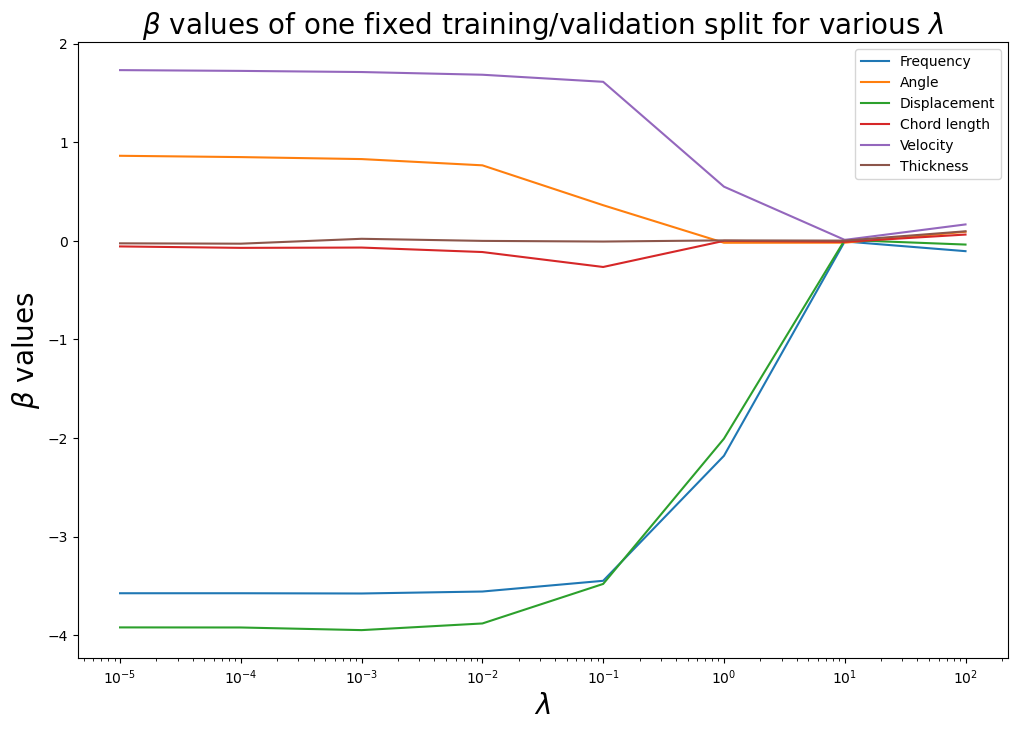

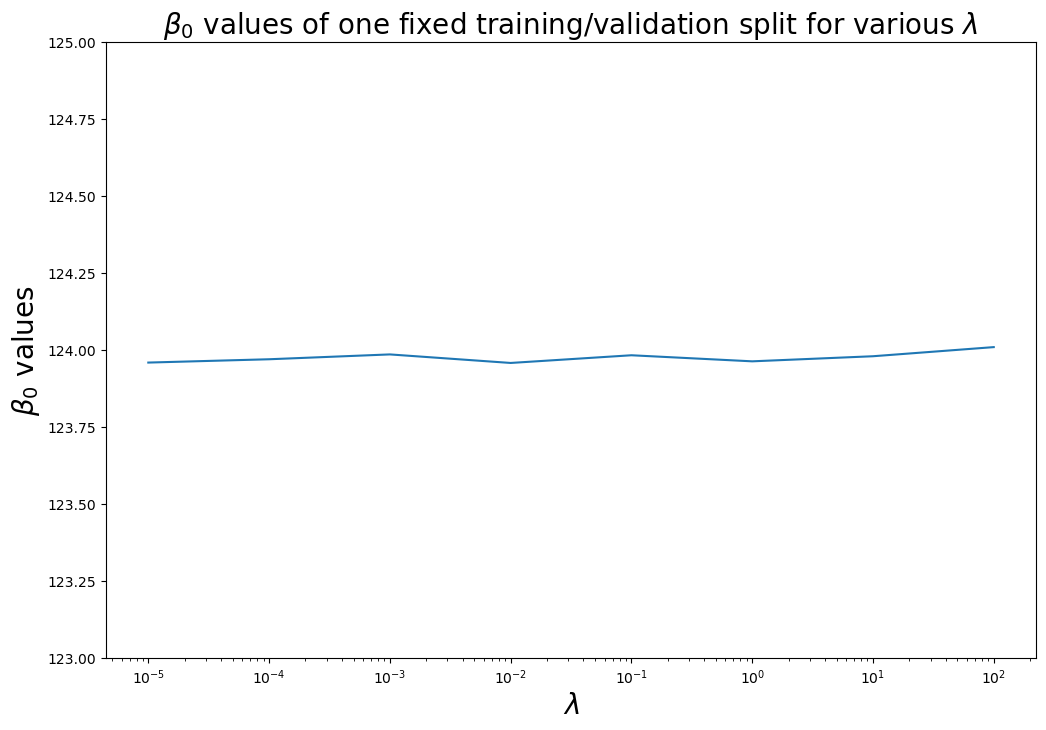

In [932]:
visualise_beta(X_train_b, y_train, k=10)

From the plot of $\beta_0$ we can see that $\lambda$ does not have effect on the intercept. This makes sense, as the regularisation is not added to $\beta_0$. Coefficient of thickness is always around $0$. Meaning that thickness is probably not related to sound pressure. The $\beta$ values are shrinked to $0$ as $\lambda$ increases, the coefficient on angle and chord length are pressed to $0$ first, indicating they have smaller effect on the sound pressure. All other three predictors(frequency, velocity, displacement) remained significant until pressed to $0$ when $\lambda$ reaches $10$. <br>

So in summary, frequency, velocity, displacement are the variables with significant influence on sound pressure. The sound pressure is higher when the velocity is higher, and when frequency and displacements are lower (these are inferred from the sign of $\beta_i$) We have seem from the scatter plot given in the beginning that angle, displacement and thickness are weakly correlated, it seems that the effect of these three predictors are all concentrated on displacement. If other evidence shows that angle is a more deterministic predictor than displacement, one can discard displacement and keep the angle predictor. 

So in summary, bias of predictor $\beta$ increases as $\lambda$ increases (from the graph, each $\beta$ value deviates more from the initial value as $\lambda$ increases). But the variance of $\beta$ shrinks with $\lambda$ because norm of $\beta$ is gradually shrinked to $0$. This is a bias-variance trade-off. <br>
Small $\lambda$: small bias, high variance <br>
Large $\lambda$: large bias, small variance

1.2.3

In this section, $\lambda$ will be fixed to $0.0001$ found in 1.2.1. And the model will be tested on the whole training and test datasets. 

In [948]:
# train the model on the whole training set 
beta_lasso,_ = gd_lasso(X_train_b, y_train, k=10, regul_strength=best_l_3)

# apply the model to test data
y_train_preds_lasso = X_train_b @ beta_lasso
y_test_preds_lasso = X_test_b @ beta_lasso

# compute out of sample scores (on the train set)
MSE_in_lasso = np.mean((y_train_preds_lasso - y_train) ** 2)
R_squared_in_lasso = 1 - np.sum((y_train_preds_lasso - y_train) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2)

# compute out of sample scores (on the train set)
MSE_out_lasso = np.mean((y_test_preds_lasso - y_test) ** 2)
R_squared_out_lasso = 1 - np.sum((y_test_preds_lasso - y_test) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)

print(f"-----Scores for LASSO regression------")
print(f"lambda = {best_l_3}")
print(f"MSE (in sample) = {MSE_in_lasso}")
print(f"R^2 score (in sample) = {R_squared_in_lasso}")

print(f"MSE (out of sample) = {MSE_out_lasso}")
print(f"R^2 score (out of sample) = {R_squared_out_lasso}")

-----Scores for LASSO regression------
lambda = 0.0001
MSE (in sample) = 1.8755571141937195
R^2 score (in sample) = 0.9177343769114572
MSE (out of sample) = 2.004374843017692
R^2 score (out of sample) = 0.9073938868360608


For comparison, print the scores from 1.1.1, 1.1.2 again (which corresponds to the case $\lambda = 0$)

In [946]:
print('------ Scores for lambda = 0 -----')
print(f"MSE (in-sample) = {MSE_in_lr}")
print(f"R^2 score (in-sample) = {R_squared_in_lr}")
print(f"MSE (out of sample) = {MSE_out_lr}")
print(f"R^2 score (out of sample) = {R_squared_out_lr}")

------ Scores for lambda = 0 -----
MSE (in-sample) = 1.8755566396402021
R^2 score (in-sample) = 0.9177343977263077
MSE (out of sample) = 2.0043755955824984
R^2 score (out of sample) = 0.9073938520660666


The scores are almost the same, so the LASSO regression does not provide any improvement on the quality of model

#### 1.3 Elastic Nets (20 marks) 
1.3.1

I use the same setting as 1.2.1 (gradient descent), but this time the gradient of loss function becomes 
$$\frac{\partial L_{\text{EN}}}{\partial \hat{\beta}} = \frac{1}{N} \hat{X}^T(\hat{X} \hat{\beta} - \boldsymbol{y}) + \lambda \left[ \alpha \text{ sign}(\beta) + (1-\alpha) 2\beta \right]$$
where $\hat{\beta} = (\beta, \beta_0)$ is the augmented coefficients.  

In [1172]:
def gd_elastic_net(X, y, k, alpha=0.5, max_iterations=5000, stop_criterion=1e-2, regul_strength=1, max_it_warn=True):
    """
    Perform gradient descent on elastic net loss function
    
    :parma X: (N, p+1) numpy array, the augmented data matrix
    :param y: (N,) numpy array, the target variable of X
    :param k: learning rate coefficient, lr = k / n_iterations
    :param alpha:(float) ratio between lasso and ridge regularisation, default 0.5
        alpha in [0, 1]
    :param max_iterations:(int) int, maximum iterations allowed
    :param stop_criterion:(float) float, stop the algorithm when 
        the percentage change in cost between two iterations < stop_criterion
    :param regul_strength:(float) the parameter lambda, default 1
    :param max_it_warn: boolean, throw maximum iteration reached warning if True
    
    :return beta: the optimal solution beta w obtained by GD
    :return iteration: number of iterations until convergence
    """
    N, P = X.shape
    # initialise beta as zero 
    beta = np.zeros(P)
    # initialise beta0 as mean of y
    beta[-1] = np.mean(y)

    nth = 0
    # initialise starting cost as infinity
    # used to store cost of previous iteration, for checking stopping criteria 
    prev_cost = np.inf
  
    # gradient descent
    for iteration in range(1, max_iterations):
        learning_rate = k / iteration
        
        # find the gradient of first term
        try:
            ascent = X.T @ (X @ beta - y) / N
        except RuntimeWarning:
            print("Catched Runtime Warning")
            print(f"lambda = {regul_strength}, norm of beta = {np.linalg.norm(beta)}, k = {k}, iteration number={iteration}")
        # deal with derivative of |beta|_1
        ascent[:-1] += alpha * regul_strength * np.sign(beta[:-1])
        # deal with derivative of |beta|_2
        if np.linalg.norm(beta[:-1]) != 0:
            ascent[:-1] += (1-alpha) * regul_strength * (2*beta[:-1])
        
        # update beta
        np.subtract(beta, learning_rate * ascent, out=beta)
        
        # convergence check on every 2^n'th iteration
        if iteration==2**nth or iteration==max_iterations-1:
            nth += 1
            # compute the lasso cost
            cost = (np.linalg.norm(y - X @ beta) ** 2 / (2 * N) + 
                    regul_strength * alpha * np.linalg.norm(beta[:-1], 1) + 
                   regul_strength * (1-alpha) * np.linalg.norm(beta[:-1]))
            
            # stop criterion
            if np.abs(cost - prev_cost) < stop_criterion:
                return beta, iteration
            
            prev_cost = cost
        
    if max_it_warn: 
        print(f"maximum iterations reached, iteration number = {iteration}")
    return beta, max_iterations

Train the model on airfoil_noise_samples with learning rate coefficient $k = 10$, $\lambda = 1, \alpha = 0.5$

In [1168]:
beta_en, it_nums_en = gd_elastic_net(X_train_b, y_train, k=10, alpha=0.5, regul_strength=1)
print(f"iteraiton number = {it_nums_en}")
print(f"beta_hat  = {beta_en[:-1]}")
print(f"beta_0_hat  = {beta_en[-1]}")
print(f"in-sample MSE for elsatic net = {np.mean((y_train - X_train_b @ beta_en) ** 2)}")

iteraiton number = 128
beta_hat  = [-1.2633109  -0.00187416 -1.09614952 -0.14972342  0.4405785  -0.1798127 ]
beta_0_hat  = 123.9702833148064
in-sample MSE for elsatic net = 11.102662709507705


The MSE is much higher than the ones obtained in 1.1 and 1.2. Better choices of $\lambda, \alpha$ will be searched in 1.3.2

1.3.2

Perform 5-fold cross validation and search for the best combination of $\lambda, \alpha$ for elastic net. 

First write functions for cross-validation and grid search. 

In [1156]:
def cross_val_elastic_net(X, y, num_folds, regul_strength, k, alpha):
    """
    Perform T-fold cross-validation on elastic net regression given a choice of hyper-parameters
    
    Arguments 
        X, y: np arrays, X is the matrix of predictors and y contains the target variable
        num_folds (int): number of folds for cross-validation
        regul_strength: the lambda parameter for this cross-validation
        k: the learning rate coefficient
            learning rate is k / niteration
        alpha:(float) ratio between lasso and ridge regularisation
        
    Returns:
        train_MSE (float): mean MSE on training set among all folds
        val_MSE (float): mean MSE on validation set among all folds
    """
    folds = cross_val_split(X.shape[0], num_folds)
    
    # stores the MSE
    train_scores = []
    val_scores = []
    
    for i in range(len(folds)):

        val_indices = folds[i]
        # define the training set: complement of validation set
        train_indices = list(set(range(X.shape[0])) - set(val_indices))

        X_train = X.take(train_indices, axis=0)
        y_train = y[train_indices]
    
        # define the validation set
        X_val = X.take(val_indices, axis=0)
        y_val = y[val_indices]

        # train the model
        beta, _ = gd_elastic_net(X, y, k=k, alpha=alpha, regul_strength=regul_strength, max_it_warn=False)
    
        # calculate MSEs and store them
        train_score = np.mean((y_train - X_train @ beta) ** 2)
        val_score = np.mean((y_val - X_val @ beta) ** 2)

        train_scores.append(train_score)
        val_scores.append(val_score)

    train_MSE = np.mean(train_scores)
    val_MSE = np.mean(val_scores)
    return train_MSE, val_MSE

This time, the $\lambda$ is searched all the way down to $10^{-10}$, because stop searching at $10^{-6}$ gives the optimal $\lambda$ at $10^{-6}$ (i.e. optimal value is on the boundary) 

$\lambda = 100$ is removed because it takes $\beta$ to infinity (probably the loss function is too steep so gradient descent went into the wrong direction) 

In [1174]:
def grid_search_elastic_net(X, y, num_folds, k, alpha):
    """
    Perform grid search for: 
        lambda = 10 from power -10 to 1
    on the elastic net regression

    Arguments 
        X, y: np arrays, X is the matrix of predictors and y contains the target variable
        num_folds (int): number of folds for cross-validation
        k: learning rate coefficient
            learning rate is k / niteration
        alpha:(float) ratio between lasso and ridge regularisation
        
    Returns:
        best_lambda (float): the best lambda obtained from grid search
        ls: list of lambda used for grid search
        mse_l: list average MSE on validation sets 
    """
    
    ls = [10.0 ** (exp) for exp in np.arange(-10, 2)]
    mse_l = []
    
    best_mse = np.inf
    best_lambda = None
    
    for l in ls:
        _, val_MSE = cross_val_elastic_net(X, y, num_folds, l, k, alpha)
        mse_l.append(val_MSE)

        if val_MSE < best_mse:
            best_mse = val_MSE
            best_lambda = l
    
    return best_lambda, ls, mse_l

Find out-of-sample MSE and $R^2$ scores for elastic net with $\alpha = 0.1, 0.5, 0.9$

In [1175]:
alphas = [0.1, 0.5, 0.9]

for alpha in alphas:
    # grid search using cross-validation
    best_l_en, _, _ = grid_search_elastic_net(X_train_b, y_train, num_folds=5, k=10, alpha=alpha)
    # train the model on the full data set
    beta_en, _ = gd_elastic_net(X_train_b, y_train, k=10, alpha=alpha, regul_strength=best_l_en)
    # compute and print scores
    y_test_preds = X_test_b @ beta_en
    MSE_out_en = np.mean((y_test - y_test_preds)**2)
    R_squared_out_en = 1 - np.sum((y_test_preds - y_test) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)
    print(f"-----alpha = {alpha}------")
    print(f"best lambda value found: {best_l_en}")
    print(f"out of sample MSE for elastic net: {MSE_out_en}")
    print(f"out of sample R^2 for elastic net: {R_squared_out_en}")

-----alpha = 0.1------
best lambda value found: 1e-10
out of sample MSE for elastic net: 2.0044612149545
out of sample R^2 for elastic net: 0.907389896280411
-----alpha = 0.5------
best lambda value found: 1e-10
out of sample MSE for elastic net: 2.004461214912636
out of sample R^2 for elastic net: 0.9073898962823451
-----alpha = 0.9------
best lambda value found: 1e-10
out of sample MSE for elastic net: 2.004461214926278
out of sample R^2 for elastic net: 0.9073898962817148


It seems that `alpha` makes no difference on the model quality. But this is because the optimal $\lambda$ value found is too small. The MSE is increasing for larger $\lambda$ chosen, indicating poor performance of elastic net for this data set. So there is really no point of choosing different $\alpha$ here (because $\alpha$ is scaled by $\lambda$ before multiplying to the norms of $\beta$ )  

1.3.3

Repeat the plot in 1.2.2, plot each value of $\beta_i$ as $\lambda$ varies and see how the regularisation strength affects each coefficient individually. 

In [1196]:
def visualise_beta_en(X, y, k, alpha, plot_beta0=False):
    """
    Visualise values of beta for one chosen training/validation split on elastic net
    
    Arguments 
        X, y: np arrays, X is the matrix of predictors and y contains the target variable
        k: learning rate coefficient
            learning rate is k / niteration
        alpha:(float) ratio between lasso and ridge regularisation
        plot_beta0: boolean, if true, plot beta0 for various lambda
    """
    
    ls = [10.0 ** (exp) for exp in np.arange(-5, 1)]
    ls = ls + list(range(2, 8))
    
    # create a matrix to store beta
    beta_mat = np.zeros((X.shape[1], len(ls)))
    
    ind = 0
    for l in ls:
        folds = cross_val_split(X.shape[0], 5)
        # only use the first fold
        val_indices = folds[0]
        # define the training set: complement of validation set
        train_indices = list(set(range(X.shape[0])) - set(val_indices))

        X_train = X.take(train_indices, axis=0)
        y_train = y[train_indices]
    
        # define the validation set
        X_val = X.take(val_indices, axis=0)
        y_val = y[val_indices]

        # train the model
        beta, _ = gd_elastic_net(X, y, k=k, alpha=alpha, regul_strength=l, max_it_warn=False)
        beta_mat[:, ind] = beta
        
        ind += 1
    
    # store column names 
    names = airfoil_noise_samples.columns.values[:-1]
    
    plt.figure(figsize=(12,8))
    plt.title(r'$\beta$ values of elastic net for various $\lambda$'+'\n'+f'alpha={alpha}', size=20)
    plt.xscale('log')
    plt.xlabel(r'$\lambda$', size=20)
    plt.ylabel(r'$\beta$ values', size=20)
    for i in range(len(names)):
        plt.plot(ls, beta_mat[i,:], label=f'{names[i]}')
    plt.axhline(0, color='r', linestyle='dashed')
    plt.legend()
    plt.show()
    
    # plot beta0 individually (because it is on a different scale)
    if plot_beta0:
        plt.figure(figsize=(12,8))
        plt.title(r'$\beta_0$ values of one fixed training/validation split for various $\lambda$'+'\n'+f'alpha={alpha}', size=20)
        plt.xscale('log')
        plt.ylim(123, 125)
        plt.xlabel(r'$\lambda$', size=20)
        plt.ylabel(r'$\beta_0$ values', size=20)
        plt.plot(ls, beta_mat[-1,:])
        plt.show()

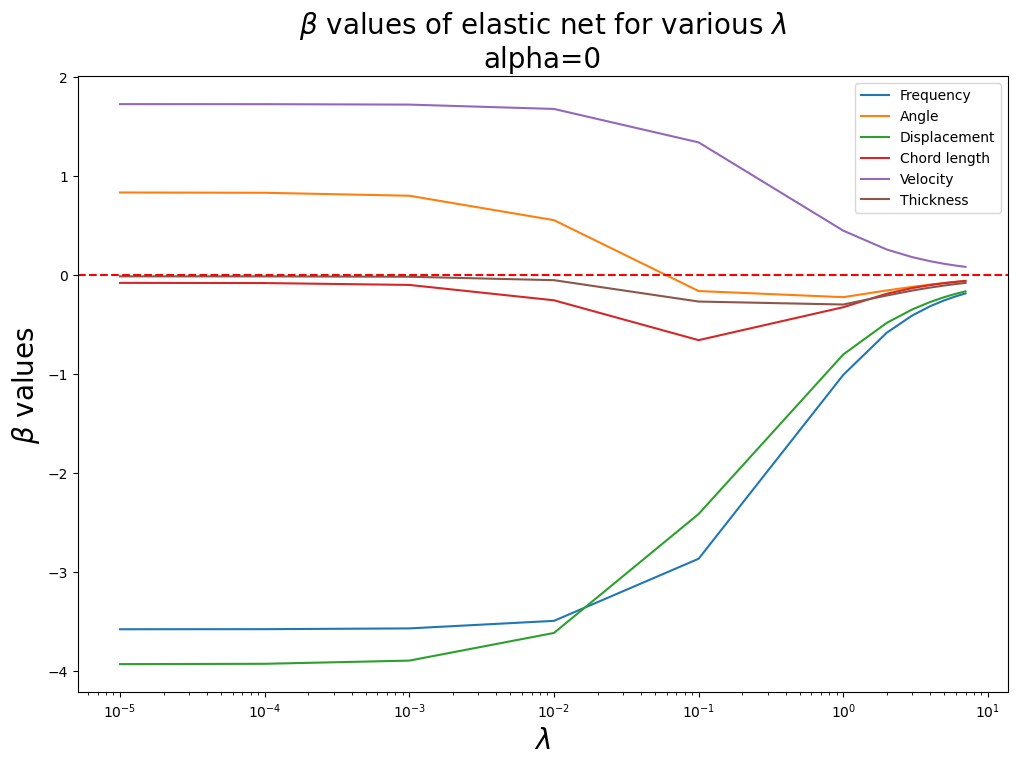

In [1197]:
visualise_beta_en(X_train_b, y_train, k=10, alpha=0)

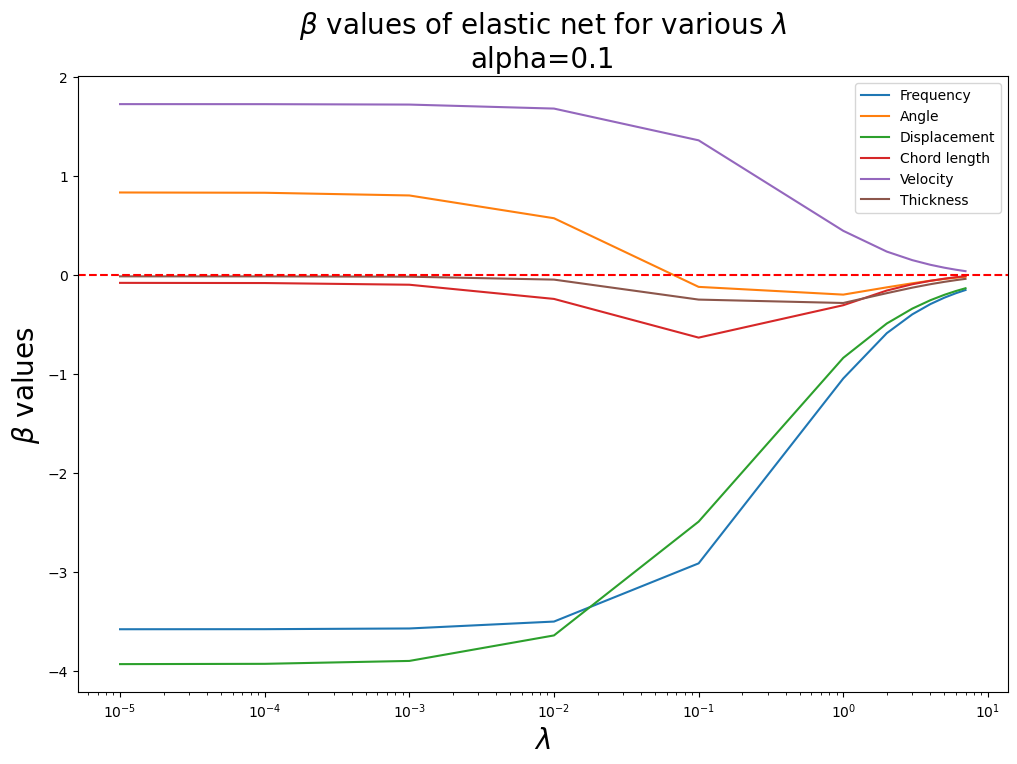

In [1198]:
visualise_beta_en(X_train_b, y_train, k=10, alpha=0.1)

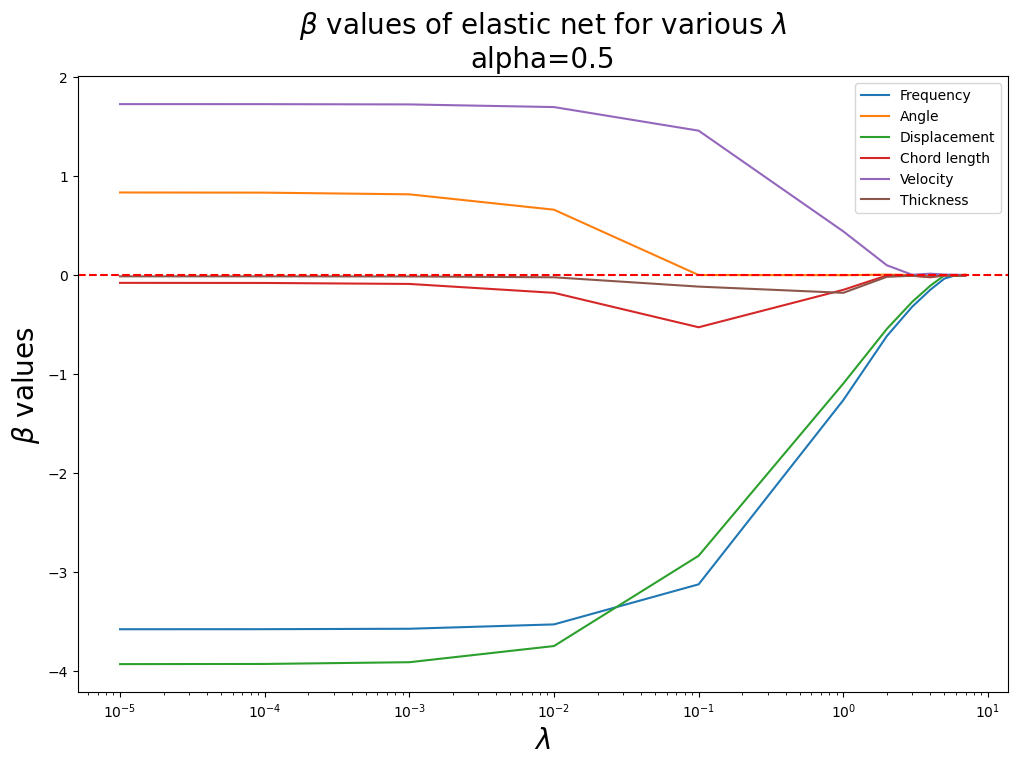

In [1199]:
visualise_beta_en(X_train_b, y_train, k=10, alpha=0.5)

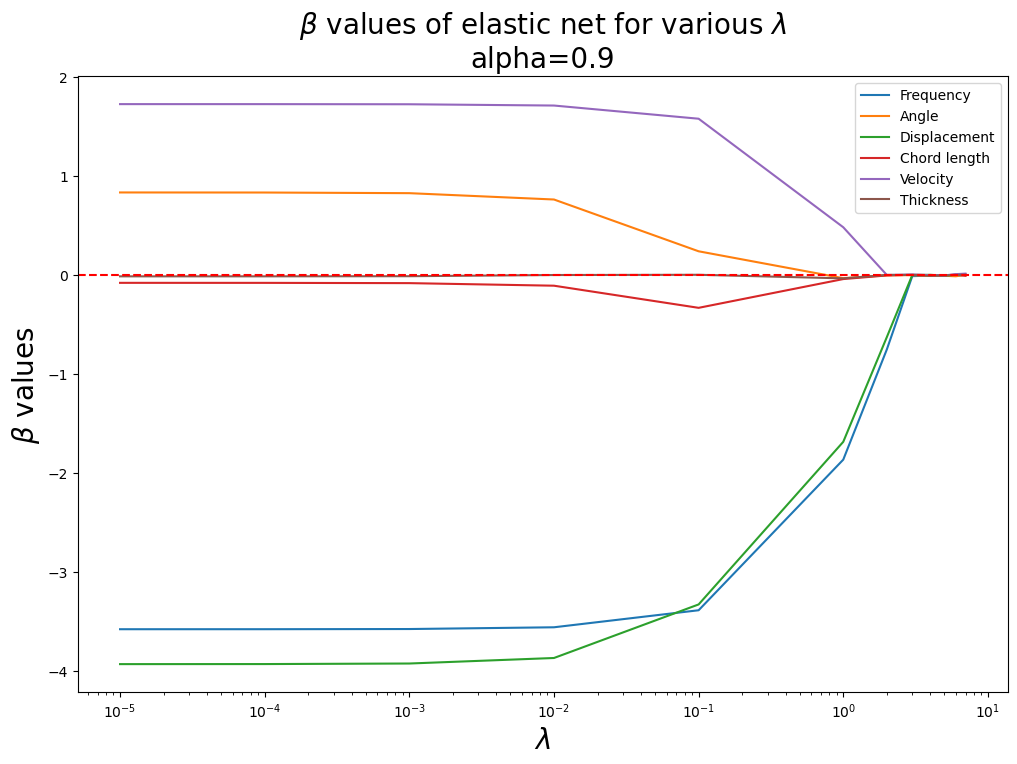

In [1200]:
visualise_beta_en(X_train_b, y_train, k=10, alpha=0.9)

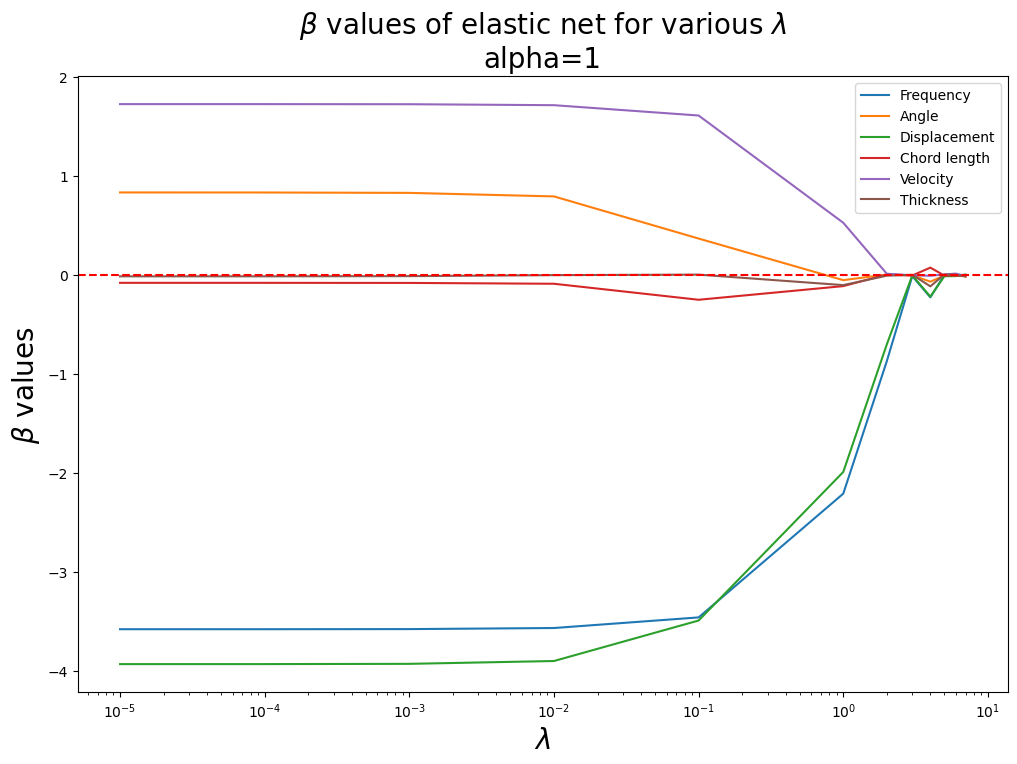

In [1201]:
visualise_beta_en(X_train_b, y_train, k=10, alpha=1)

For $\alpha = 0.5$, a combination of the effect of LASSO and ridge can be seen. For example, the coefficient for angle is suddenly pressed almost to $0$ when $\lambda = 1$, but all other predictors (except thickness that always stayed at $0$) gradually shrinks to $0$. In the case of $\alpha = 1$ (pure LASSO), coefficients for angle and chord length are both pressed almost to $0$ at $\lambda = 1$. In the case of $\alpha = 1$ (pure ridge), coefficients for angle and chord length seems to be over-shot to negative values, though they are both shrinked to $0$ when $\lambda$ reaches $10$. 

#### 1.4 kNN regression (10 marks)
1.4.1

In this section, I will write codes for kNN regression and perform cross-validation to search for the best $k$. 

First write auxiliary function `k_neighbour` that finds indices of k nearest neighbours 

Use the Euclidean distance as distance measure

In [822]:
def euclidian_distance(p, q):
    """
    Find Euclidean distance between two sets of points
    
    :param p, q: k x D np arrays, represents k points in D-dimensional space
    
    :return d: 1d array of length k, distances
    """
    return np.sqrt(np.sum((q - p) ** 2, axis=1))

In [846]:
def k_neighbours(X_train, X_test, k, return_distance=False):
    """
    Find the indices of k nearest neighbours in the training set for all points in X_test
    
    :param X_train: (n, p) np array, the training set predictors
    :param X_test: (n, p) np array, the testing set predictors
    :param k (int): hyper-paramter of kNN
    :param return_distance: boolean, default false
        true: return distances together with neighbour indices
        false: only return neighbouring indices
        
    :return dist: (n, k) np array, distances to k nearest neighbours
    :return neigh_ind: (n, k) np array, indices of k nearest neighrbous
    """
    
    n_neighbours = k
    dist = []
    neigh_ind = []
  
    # compute distance from each point x_text in X_test to all points in X_train
    point_dist = [euclidian_distance(x_test, X_train) for x_test in X_test]

    # determine which k training points are closest to each test point
    for row in point_dist:
      
        enum_neigh = enumerate(row)
        sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:k]

        ind_list = [tup[0] for tup in sorted_neigh]
        dist_list = [tup[1] for tup in sorted_neigh]

        dist.append(dist_list)
        neigh_ind.append(ind_list)
  
        if return_distance:
            return np.array(dist), np.array(neigh_ind)
  
    return np.array(neigh_ind)

Predict using the mean of $y$ values in the training set of the $k$ nearest neighbours

In [882]:
def predict_kNN(X_train, y_train, X_test, k):
    """
    Predict classification based on k nearest neighbours
    with equal weights
    
    :param X_train: M x D np array, training set
    :param y_train: 1d array of length M, the classifications of X_train
    :param X_test: N x D np array, testing set
    :param k: hyper-parameter, 5 by default
    
    :return y_pred: 1d array of length N, the predicted values of y on X_test
    """
    # each of the k neighbours contributes equally to the classification of any data point in X_test  
    neighbours = k_neighbours(X_train, X_test, k=k)
    # use the mean value of neighbours as predictors
    y_pred = np.array([np.mean(y_train[neighbour]) for neighbour in neighbours])

    return y_pred

Perform 5-fold cross-validation to tune the parameter $k$. The score is chosen to be average MSE on the validation set among all folds

In [863]:
def cross_val_kNN(X, y, num_folds, k):
    """
    Perform T-fold cross-validation on kNN given a choice of hyper-parameters
    
    Arguments 
        X, y: np arrays, X is the matrix of predictors and y contains the target variable
        num_folds (int): number of folds for cross-validation
        k: the hyper-parameter for kNN
        
    Returns:
        val_MSE (float): mean MSE on validation set among all folds
    """
    folds = cross_val_split(X.shape[0], num_folds)
    
    # a list to store the MSE
    val_scores = []
    
    for i in range(len(folds)):

        val_indices = folds[i]
        # define the training set: complement of validation set
        train_indices = list(set(range(X.shape[0])) - set(val_indices))

        X_train = X.take(train_indices, axis=0)
        y_train = y[train_indices]
    
        # define the validation set
        X_val = X.take(val_indices, axis=0)
        y_val = y[val_indices]

        # train the model
        y_val_pred = predict_kNN(X_train, y_train, X_val, k=k)
    
        # calculate MSE on validation set and store
        val_score = np.mean((y_val - y_val_pred) ** 2)
        val_scores.append(val_score)

    val_MSE = np.mean(val_scores)
    return val_MSE

Grid search for $k \in \{2, 4, 6, \cdots, 30\}$

In [889]:
def grid_search_kNN(X, y, num_folds):
    """
    Perform grid search for: 
        k = 2, 4, 6, ..., 30
    on the kNN algorithm

    Arguments 
        X, y: np arrays, X is the matrix of predictors and y contains the target variable
        num_folds (int): number of folds for cross-validation
        
    Returns:
        best_k (float): the best k obtained from grid search
        ls: list of k values used for grid search
        mse_l: list average MSE on validation sets 
    """
    
    ks = np.arange(2, 32, 2)
    mse_l = []
    
    best_mse = np.inf
    best_k = None
    
    for k in ks:
        print(f"k = {k}")
        val_MSE = cross_val_kNN(X, y, num_folds, k)
        mse_l.append(val_MSE)

        if val_MSE < best_mse:
            best_mse = val_MSE
            best_k = k
    
    return best_k, ks, mse_l

We use the standardised data here so that the metric Euclidean distance makes sense. Because now the range of values taken by each predictor is the same.

In [890]:
best_k, ks, mse_l_kNN = grid_search_kNN(X_train_std, y_train.to_numpy(), 5)

k = 2
k = 4
k = 6
k = 8
k = 10
k = 12
k = 14
k = 16
k = 18
k = 20
k = 22
k = 24
k = 26
k = 28
k = 30


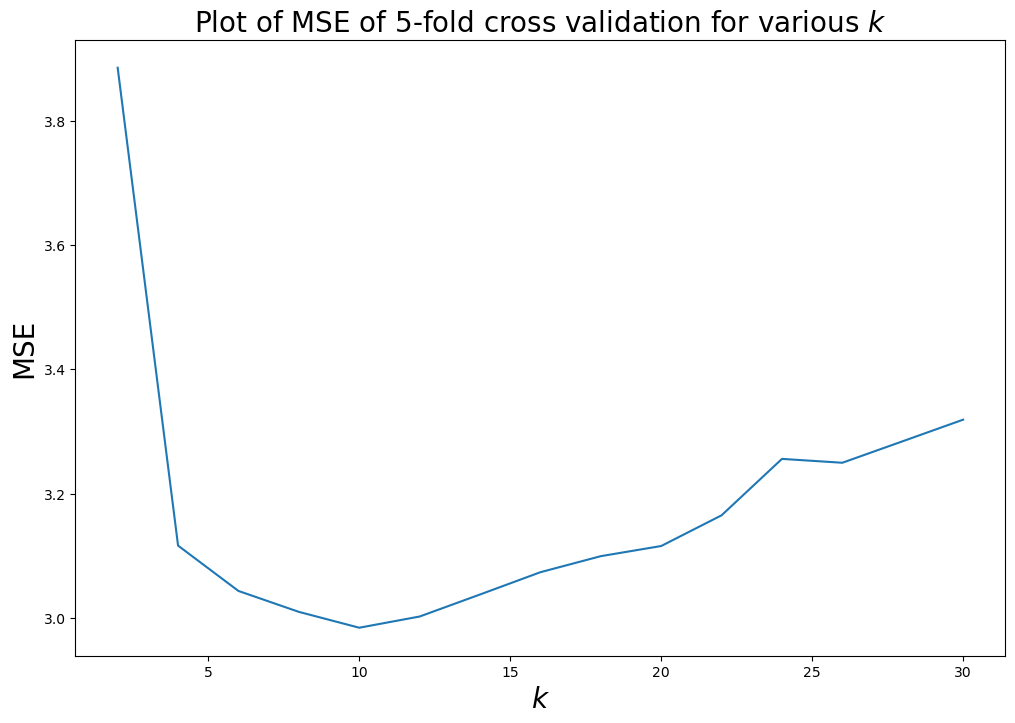

In [891]:
plt.figure(figsize=(12,8))
plt.title(r'Plot of MSE of 5-fold cross validation for various $k$', size=20)
plt.xlabel(r'$k$', size=20)
plt.ylabel('MSE', size=20)
plt.plot(ks, mse_l_kNN)

The plot shows a clear decrease and then increase trend in MSE. And the best $k$ value (the $k$ giving lowest MSE) is printed below

In [892]:
best_k

10

1.4.2

Train the kNN model using $k=10$ (the best value found in 1.4.1), and test the kNN model on testing set.

In [893]:
y_test_pred_kNN = predict_kNN(X_train_std, y_train, X_test_std, k=5)
MSE_out = np.mean((y_test_pred_kNN - y_test) ** 2)
print(f"MSE (out-of-sample) of kNN = {MSE_out}")

MSE (out-of-sample) of kNN = 2.996683888721045


In [952]:
print(f"MSE (out of sample) of linear regression(without regularisation) = {MSE_out_lr}")
print(f"MSE (out of sample) of LASSO = {MSE_out_lasso}")
print(f"MSE (out of sample) of elastic net = {MSE_out_en}")

MSE (out of sample) of linear regression(without regularisation) = 2.0043755955824984
MSE (out of sample) of LASSO = 2.004374843017692
MSE (out of sample) of elastic net = 2.0044604204420984


From the out-of-sample MSE obtained, we can see that linear regressions have better performance than kNN. But the effect of regularisation is ignorable. The simplest linear model is already enough to model the relationships. <br>

The relationships between each predictor to the sound pressure are already explained in 1.2.2 below the plot of $\beta_i$ values when the LASSO regularisation strength changes. But I will paste them again here: <br>

So in summary, frequency, velocity, displacement are the variables with significant influence on sound pressure. The sound pressure is higher when the velocity is higher, and when frequency and displacements are lower (these are inferred from the sign of $\beta_i$) We have seem from the scatter plot given in the beginning that angle, displacement and thickness are weakly correlated, it seems that the effect of these three predictors are all concentrated on displacement. If other evidence shows that angle is a more deterministic predictor than displacement, one can discard displacement and keep the angle predictor. 

## Task 2: Classification  (50 marks)



### data exploration and cleaning

In [1070]:
# import data
diabetes_samples = pd.read_csv("diabetes_samples.csv", decimal=",")
diabetes_test = pd.read_csv("diabetes_test.csv", decimal=",")
# check the data frame
diabetes_test.head()

patient_number  cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  \
0               3          217       75        54             4.0   20   
1               5          164       91        67             2.4   20   
2               6          170       69        64             2.7   20   
3               8          164       71        63             2.6   20   
4               9          230      112        64             3.6   20   

   height  weight   bmi  systolic_bp  diastolic_bp  waist  hip  \
0      67     187  29.3          110            72     40   45   
1      70     141  20.2          122            86     32   39   
2      64     161  27.6          108            70     37   40   
3      72     145  19.7          108            78     29   36   
4      67     159  24.9          100            90     31   39   

   waist_hip_ratio     diabetes  
0             0.89  No diabetes  
1             0.82  No diabetes  
2             0.93  No diabetes  
3             0.81  No diabetes  
4             0.79  No diabetes

In [1071]:
diabetes_samples.dtypes

patient_number       int64
cholesterol          int64
glucose              int64
hdl_chol             int64
chol_hdl_ratio     float64
age                  int64
height               int64
weight               int64
bmi                float64
systolic_bp          int64
diastolic_bp         int64
waist                int64
hip                  int64
waist_hip_ratio    float64
diabetes            object
dtype: object

In [1072]:
print(diabetes_samples['diabetes'].unique())

['No diabetes' 'Diabetes']


In [1073]:
# check duplicates
sum(diabetes_samples.duplicated())

0

In [1074]:
# check NaNs
print(diabetes_samples.isnull().values.any())
print(diabetes_test.isnull().values.any())

False
False


From the dtypes, all columns except the target `diabetes` are numerical. And it seems that patient_number is an index. For convenience, first convert `diabetes` to numerical values $\pm 1$. $+1$ (positive) corresponds to diabetes and $-1$ (negative) corresponds to no diabetes. 

In [1075]:
# clean data

# convert target diabetes to +1 and -1
class_map = {'No diabetes': -1.0, 'Diabetes': 1.0}
diabetes_samples['diabetes'] = diabetes_samples['diabetes'].map(class_map)
diabetes_test['diabetes'] = diabetes_test['diabetes'].map(class_map)

diabetes_samples.head()

patient_number  cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  \
0             115          224       85        30             7.5   36   
1             318          194       95        36             5.4   63   
2              73          207       75        44             4.7   30   
3              69          144       81        28             5.1   30   
4             326          181      177        24             7.5   64   

   height  weight   bmi  systolic_bp  diastolic_bp  waist  hip  \
0      69     205  30.3          150            99     37   41   
1      58     210  43.9          140           100     44   53   
2      72     180  24.4          118            62     35   41   
3      72     165  22.4          118            78     31   38   
4      71     225  31.4          130            66     44   47   

   waist_hip_ratio  diabetes  
0             0.90      -1.0  
1             0.83      -1.0  
2             0.85      -1.0  
3             0.82      -1.0  
4             0.94       1.0

In [1076]:
# set patient_number as index, and drop that column
diabetes_samples = diabetes_samples.set_index(diabetes_samples['patient_number']).drop(diabetes_samples.columns[0], axis=1)
diabetes_test = diabetes_test.set_index(diabetes_test['patient_number']).drop(diabetes_test.columns[0], axis=1)

diabetes_samples.head()

cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  height  \
patient_number                                                                
115                     224       85        30             7.5   36      69   
318                     194       95        36             5.4   63      58   
73                      207       75        44             4.7   30      72   
69                      144       81        28             5.1   30      72   
326                     181      177        24             7.5   64      71   

                weight   bmi  systolic_bp  diastolic_bp  waist  hip  \
patient_number                                                        
115                205  30.3          150            99     37   41   
318                210  43.9          140           100     44   53   
73                 180  24.4          118            62     35   41   
69                 165  22.4          118            78     31   38   
326                225  31.4          130            66     44   47   

                waist_hip_ratio  diabetes  
patient_number                             
115                        0.90      -1.0  
318                        0.83      -1.0  
73                         0.85      -1.0  
69                         0.82      -1.0  
326                        0.94       1.0

In [1077]:
# extract X and y
y_train = diabetes_samples.loc[:, 'diabetes']
X_train = diabetes_samples.iloc[:, :-1]

y_test = diabetes_test.loc[:, 'diabetes']
X_test = diabetes_test.iloc[:, :-1]

print(f'number of predictors = {X_test.shape[1]}')
X_test.head()

number of predictors = 13


cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  height  \
patient_number                                                                
3                       217       75        54             4.0   20      67   
5                       164       91        67             2.4   20      70   
6                       170       69        64             2.7   20      64   
8                       164       71        63             2.6   20      72   
9                       230      112        64             3.6   20      67   

                weight   bmi  systolic_bp  diastolic_bp  waist  hip  \
patient_number                                                        
3                  187  29.3          110            72     40   45   
5                  141  20.2          122            86     32   39   
6                  161  27.6          108            70     37   40   
8                  145  19.7          108            78     29   36   
9                  159  24.9          100            90     31   39   

                waist_hip_ratio  
patient_number                   
3                          0.89  
5                          0.82  
6                          0.93  
8                          0.81  
9                          0.79

In [1078]:
# check for inf
print(np.isinf(X_train).values.any())
print(np.isinf(X_test).values.any())

False
False


Now produce scatter plots of each pair of predictors to see their distributions and correlations between each other

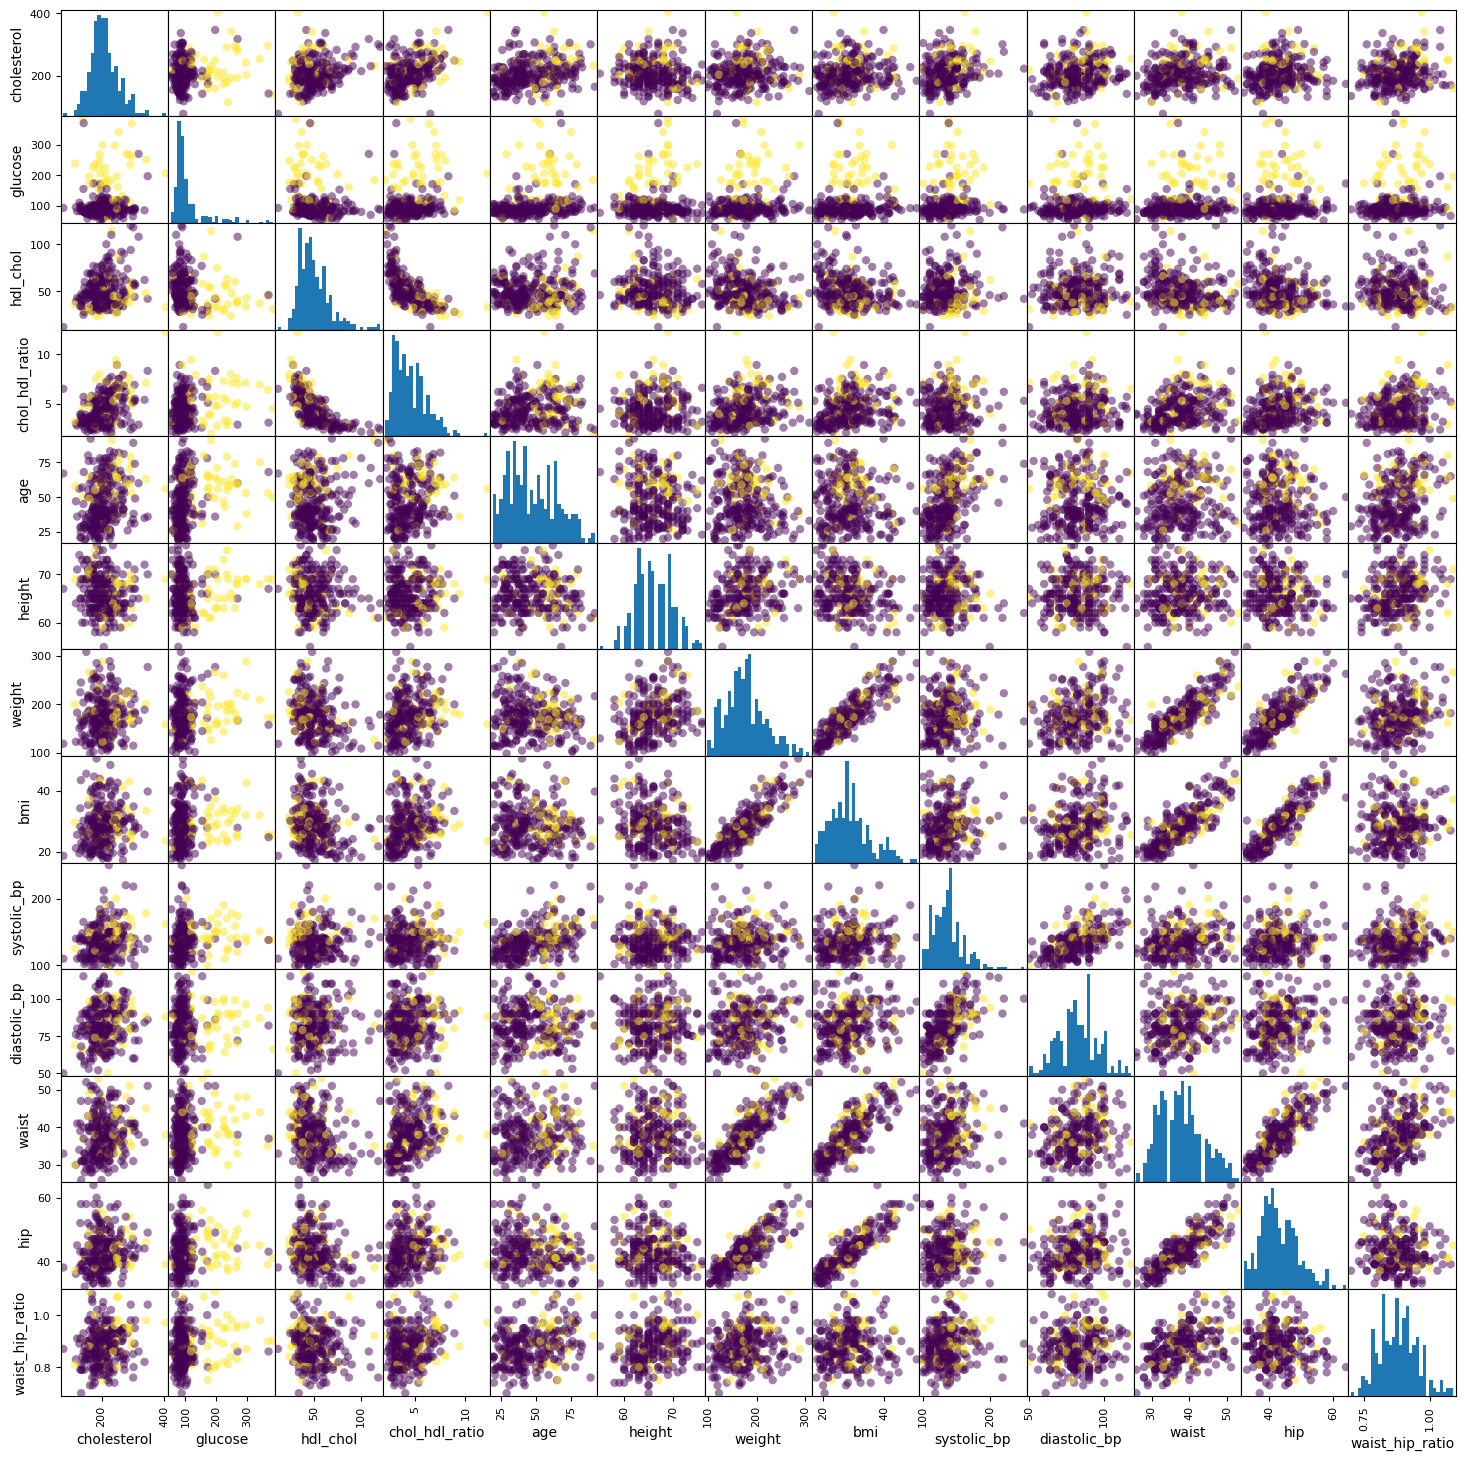

In [1079]:
# scatter plots between each pair of predictors
grr = pd.plotting.scatter_matrix(X_train, c=y_train, marker="o", figsize=(18, 18), hist_kwds={'bins': 30}, alpha=.5)

Two colours in the plot represents two classes (diabete and no diabete). All predictors have a bell-shaped distribution as seen from the blue histgrams. From the scatter plots including `glucose`, it seems that glucose values separate the data into two clusters. `Weight`, `hip`, `waist`, `bmi` have positive correlations between each other, and `hdl_chol` has some negative correlation with `hdl_chol_ratio`. 

#### 2.1 Random forest (20 marks)
2.1.1

In this section, I will first write codes for cross-entropy, then build trees using cross-entropy, and finally construct random forest consisting of trees. Then, 4-fold cross-validation will be performed to tune the hyper-parameters. 

First define functions that can construct decision trees. 
`cross_entropy` below is a function that calculates cross entropy in an region given labels y for that region

In [1080]:
def cross_entropy(y):
    """ 
    Calculate the cross entropy for labels.
    Arguments:
        y: vector of training labels, of shape (N,).
    Returns:
        (float): the cross-entropy for y.
    """

    # count number of samples for each label in y，and store in label_weights
    # NOTE this weight is not the weight in 2.1.3, this is the frequencies of each class
    label_weights = {yi: np.sum(y==yi) for yi in set(y)}  
    for yi in set(y):
        label_weights[yi] = np.sum(y == yi)

    total_weight = sum(label_weights.values())
    CE = 0
    for label, weight in label_weights.items():
        # each term of cross-entropy
        CE -= (weight/total_weight) * np.log(weight/total_weight)

    return CE

In [1081]:
# test cross_entropy on the training set
# assume uniform weights
cross_entropy(y_train)

0.44160848856838697

Define `split_samples` that split samples to left and right subsets given threshold value `value` and the feature index `column`

In [1082]:
def split_samples(X, y, column, value):
    """
    Return the split of data using given threshold value
    assume X is numerical (not categorical)
  
    Arguments:
        X: np array of shape (N, D), training features,
        y: vector of training labels, of shape (N,).
        column: the column of the feature for splitting.
        value: splitting threshold 
    Returns:
        tuple(np.array, np.array): tuple of subsets of X splitted based on column-th value.
        tuple(np.array, np.array): tuple of subsets of y splitted based on column-th value.
    """ 

    left_mask = (X[:, column] < value)
  
    X_left, X_right = X[left_mask, :], X[~left_mask, :]
    y_left, y_right = y[left_mask], y[~left_mask]

    return (X_left, X_right), (y_left, y_right)

The following function finds the best splitting threshold for a given column, based on cross entropy. It is performed on the set of thresholds chosen by all unique values of that column

In [1083]:
def CE_split_value(X, y, column):
    """
    Calculate the cross entropy based on `column` with the split that minimizes the cross entropy
    Arguments:
        X: np array of shape (N, D), training features,
        y: vector of training labels, of shape (N,).
        column: the column of the feature for calculating. 0 <= column < D
    Returns:
        CE_val: the resulted cross-entropy value 
        threshold: the corresponding thresholds for splitting.
    """
  
    unique_vals = np.unique(X[:, column])

    assert len(unique_vals) > 1, f"There must be more than one distinct feature value. Given: {unique_vals}."

    CE_val, threshold = np.inf, None
  
    # split the values of i-th feature and calculate the cost 
    for value in unique_vals:
        (X_l, X_r), (y_l, y_r) = split_samples(X, y, column, value)
        
        # if one side is empty, skip the split (not valid split)
        if len(y_l) == 0 or len(y_r) == 0:
            continue
        
        # weigh entropy by sample size
        p_left = len(y_l)/(len(y_l) + len(y_r))
        p_right = 1 - p_left
        new_cost = p_left * cross_entropy(y_l) + p_right * cross_entropy(y_r)
        if new_cost < CE_val:
            CE_val, threshold = new_cost, value
    
    return CE_val, threshold

Now apply CE_split_value to each feature and finds the feature, threshold values that gives the lowest cross-entropy. 

In [1084]:
def CE_split(n_features, X, y):
    """
    Choose the best feature to split according to criterion.
    Args:
        n_features: number of sampled features.
        X: np array of shape (N, D), training features,
        y: vector of training labels, of shape (N,).
    Returns:
        (int, float): the best feature index and value used in splitting.
        If the feature index is None, then no valid split for the current Node.
    """
    
    _, D = X.shape
    
    # check n_features is not greater than D
    if n_features > D:
        raise Exception("n_features > D, cannot bag features")
    
    # sample some features (bagging)
    columns = np.random.choice(np.arange(0, D), int(n_features), replace=False)
  
    # initialize `split_column` to None, 
    # so if None returned this means there is no valid split at the current node.
    min_CE_index, split_column, split_val = np.inf, None, 0
    for column in columns:
        # skip column if samples are not seperable by that column.
        if len(np.unique(X[:, column])) < 2:
            continue

        CE_index, val = CE_split_value(X, y, column)  
        if CE_index < min_CE_index:
            min_CE_index, split_column, split_val = CE_index, column, val

    return split_column, split_val

In [1085]:
# test on the training set, with all features included
CE_split(13, X_train.to_numpy(), y_train.to_numpy())

(1, 118.0)

Column 1 is chosen, which is the `glucose` column. This is consistent with the scatter plot. Now we write the decision tree constructor

In [1086]:
# auxiliary function
def majority_vote(y):
    """
    Return the label which appears the most in y.
    Args:
        y: vector of training labels, of shape (N,).
    Returns:
        (int): the majority label
    """
    majority_label = {yi: np.sum(y==yi) for yi in set(y)}

    return max(majority_label, key=majority_label.get)

In [1087]:
def build_tree(n_features, X, y, feature_names, depth, max_depth=10, min_samples_leaf=2):
    """
    Build the decision tree according to the data.
    for random forest
    
    Args:
        n_features: number of sampled features.
        X: (np.array) training features, of shape (N, D).
        y: (np.array) vector of training labels, of shape (N,).
        feature_names (list): record the name of features in X in the original dataset.
        depth (int): current depth for this node. Root has depth 1
        max_depth (int): maximum depth of tree allowed. If max_depth reached, stop splitting further 
        min_samples_leaf (int): minimum number of samples allowed for each leaf, 
            if the data X contains less than samples, treat as leaf node directly 
    Returns:
        (dict): a dict denoting the decision tree (binary-tree). Each (non-leaf) node has seven attributes:
            1. 'feature_name': The column name of the split.
            2. 'feature_index': The column index of the split.
            3. 'value': The threshold value used for the split.
            4. 'left': The left sub-tree with the same structure.
            5. 'right' The right sub-tree with the same structure.
            leaf-node:
            1. 'majority_label': For leaf nodes, this stores the dominant label. This is None for non-leaf node
    """
    # in the following 3 cases
    # (i) no feature, (ii) all lables are the same, (iii) depth exceed, or (iv) X is too small
    # treat as leaf node and directly return the node
    if len(np.unique(y))==1 or depth>=max_depth or len(X)<=min_samples_leaf: 
        return {'majority_label': majority_vote(y)}
  
    split_index, split_val = CE_split(n_features, X, y) 

    # If no valid split at this node (None returned), and treat this as leaf node
    # use majority vote to determine the label
    if split_index is None:
        return {'majority_label': majority_vote(y)}

    (X_l, X_r), (y_l, y_r) = split_samples(X, y, split_index, split_val)
    return {
        'feature_name': feature_names[split_index],
        'feature_index': split_index,
        'value': split_val,
        'majority_label': None,
        # build sub-trees (build_tree is a recursion function)
        # increase the depth by 1 for sub-trees
        'left': build_tree(n_features, X_l, y_l, feature_names, depth + 1, max_depth, min_samples_leaf),
        'right': build_tree(n_features, X_r, y_r, feature_names, depth + 1, max_depth, min_samples_leaf)
    }

Build the random forest using `build_tree`

In [1088]:
def train_rf_random(B, n_features, n_samples, X, y, max_depth=10):
    """
    Build the random forest tree according to the training data.
    assuming all columns of X are numerical
    each tree is trained using random samples chosen from X
    
    Args:
        B (int): number of decision trees in the forest
        n_features (int): number of features for bagging
        n_samples (int): number of samples in X for bagging
        X: (pd.Dataframe) training features, of shape (N, D). Each X[i] is a training sample.
        y: (pd.Series) vector of training labels, of shape (N,). 
            y[i] is the label for X[i]
        max_depth: maximum depth of trees allowed, default 10
        
    Return:
        trees: list of decision trees (dictionaries in python)
    """

    feature_names = X.columns.tolist()
    X = X.to_numpy()
    y = y.to_numpy()
    N = X.shape[0]
    training_indices = np.arange(N)
    if n_samples > N:
        raise Exception("n_samples must be smaller than or equal to training data size")
    # build a container
    trees = []
    
    # construct the forest
    for i in range(B):
        # sample some data for training each tree
        sample = np.random.choice(training_indices, size=int(n_samples), replace=True)
        X_sample = X[sample, :]
        y_sample = y[sample]
        tree = build_tree(n_features, X_sample, y_sample, feature_names, depth=1, max_depth = max_depth)
        trees.append(tree)

    return trees

Suppose the random forest is trained, a prediction function is needed for new data input. The following function `classify` trace down a given tree and find the leaf node containing data x

In [1089]:
def classify(tree, x):
    """
    Classify a single sample with the fitted decision tree.
    
    Args:
        tree: dictionary, representing a decision tree
        x: ((pd.Dataframe) a single sample features, of shape (D,).
    Returns:
        (int): predicted testing sample label.
    """
    
    # leaf node 
    if tree['majority_label'] is not None:  
        return tree['majority_label']
    # non-leaf splitting node 
    else:
        if x[tree['feature_index']] < tree['value']:
            return classify(tree['left'], x)
        else:
            return classify(tree['right'], x)

In [1090]:
def predict_rf(rf, X):
    """
    Predict classification results for X based on trained random forest
    
    Args:
        rf: A trained random forest through train_rf function.
        X: np array of shape (N, D), testing sample features.  
    Returns:
        (np.array): predicted testing sample labels, of shape (N,).
    """

    # aggregate perdictions obtained from all decision trees by majority rule
    def aggregate(decisions):
        return max(set(decisions), key=decisions.count)

    if len(X.shape) == 1:
        return aggregate([classify(tree, X) for tree in rf])
    else:
        return np.array([aggregate([classify(tree, x) for tree in rf]) for x in X])

For cross validation, a score is required. Accuracy = (TP + TN) / (number of data) is used as measure here

In [1091]:
def rf_score(rf, X_test, y_test):
    """
    Find accuracy of estiamte obtained from random forest
    Args:
        rf: A trained random forest through train_rf function.
        X_test: np array of shape (N, D), the testing set
        y_test: np array of shape (N, ), true labels of testing set
    Returns:
        (float): accuracy
    """
    y_pred = predict_rf(rf, X_test)
    return np.mean(y_pred==y_test)

In [30]:
# test the codes on a small forest (B = 5)
n_features = np.floor(np.sqrt(X_train.shape[1]))
n_sample = np.floor(X_train.shape[0] / 5)

# train using standard bootstrap
rf = train_rf_random(5, n_features, n_sample, X_train, y_train)

print(f"score for standard bootstrap {rf_score(rf, X_test.to_numpy(), y_test.to_numpy())}")

score for standard bootstrap 0.8974358974358975


Perform 4-fold cross validation to find the best `B`(number of trees) and `max_depth` (maximum depth for each tree)

In [698]:
# the cross validation splitting function from notebook SVM
def cross_val_split(N, num_folds):
    """
    return indices for splitting data
    indices are shuffled before splitting
    
    :param N: sample size
    :param num_folds: number of folds for T-fold cv
    
    :return folds: list of arrays, each contains indices for that fold
    """
    fold_size = N // num_folds
    index_perm = np.random.permutation(np.arange(N))
    folds = []
    for k in range(num_folds):
        folds.append(index_perm[k*fold_size:(k+1)*fold_size])
    return folds

Number of samples chosen to train each tree will affect the depth of tree. So a grid search over different `n_sample` values corresponds to grid search over different depth of tree

In [35]:
# there are three hyper parameters here, but only B, n_sample will be varied in cross-validation
def cross_val_evaluate(data, num_folds, B, n_samples, n_features):
    """
    Perform T-fold cross-validation on random forest given a choice of hyper-parameters
    
    Arguments 
        data: pandas dataframe, containing X and y
            assume the last column is y
        num_folds (int): number of folds for cross-validation
        B (int): number of decision trees.
        n_samples (int): size of bootstrap sample
        n_features (int): number of features for bagging
        
    Returns:
        train_scores (list): scores on training set for each fold 
        val_scores (list): scores on validation set for each fold 
    """
    folds = cross_val_split(data.shape[0], num_folds)

    train_scores = []
    val_scores = []
    
    for i in range(len(folds)):

        val_indices = folds[i]
        # define the training set: complement of validation set
        train_indices = list(set(range(data.shape[0])) - set(val_indices))

        X_train = data.iloc[train_indices, :-1]
        y_train = data.iloc[train_indices, -1]
    
        # define the validation set
        X_val = data.iloc[val_indices, :-1]  
        y_val = data.iloc[val_indices, -1]

        # train the model
        rf = train_rf_random(B, n_features, n_samples, X_train, y_train)
    
        # calculate scores and store them
        train_score = rf_score(rf, X_train.to_numpy(), y_train.to_numpy())
        val_score = rf_score(rf, X_val.to_numpy(), y_val.to_numpy())

        train_scores.append(train_score)
        val_scores.append(val_score)

    return train_scores, val_scores

Define function for grid search among various values of `B, n_samples` <br>
define the score of each validation to be: the mean accuracy on the validation sets

We search among $B \in \{3, 6, 9, \cdots, 30\}$ and `n_samples` = $\frac{N}{10}, \frac{2N}{10}, \frac{3N}{10}, \cdots, \frac{7N}{10}$ where $N$ is the (num_folds - 1)/num_folds * size of data.

In [65]:
from itertools import product

def grid_search_rf(data, num_folds, n_features):
    """
    Perform grid search for: 
        B = 3, 6, 9, ..., 30
        n_samples = N/10, 2N/10, 3N/10, ..., 7N/10
            where N = size of the cv training set

    Arguments 
        data: pandas dataframe, containing X and y
            assume the last column is y
        num_folds (int): number of folds for cross-validation
        n_features (int): number of features for bagging
        
    Returns:
        best_B, best_n (int): best choices of B and n found
        best_score tuple (float, float): average rf score on training and validation sets 
            when best_B and best_n are used
    """
    
    Bs = np.arange(3, 31, 3)
    y = data.iloc[:, -1]
    N = data.shape[0] * (num_folds - 1) / num_folds
    ns = np.arange(0.1, 1, 0.1) * N
    ns = np.floor(ns)
    
    best_score = -np.inf
    best_B, best_n = None, None
    
    for B, n in product(Bs, ns):
        print(f"B = {B}")
        print(f"n = {n}")
        _, val_scores = cross_val_evaluate(data, num_folds, B, n, n_features)
        # find the average scores among all folds
        avg_val_score = np.mean(val_scores)
        if avg_val_score > best_score:
            best_B, best_n, best_score = B, n, avg_val_score
    
    return best_B, best_n, best_score

We use the best `n_features` value given in lectures
$$\tilde{p} = \sqrt{p}$$
for classification

In [66]:
n_features = np.floor(np.sqrt(X_train.shape[1]))
B_best, n_best, best_scores = grid_search_rf(diabetes_samples, 4, n_features)

B = 3
n = 20.0
B = 3
n = 40.0
B = 3
n = 61.0
B = 3
n = 81.0
B = 3
n = 102.0
B = 3
n = 122.0
B = 3
n = 143.0
B = 3
n = 163.0
B = 3
n = 184.0
B = 6
n = 20.0
B = 6
n = 40.0
B = 6
n = 61.0
B = 6
n = 81.0
B = 6
n = 102.0
B = 6
n = 122.0
B = 6
n = 143.0
B = 6
n = 163.0
B = 6
n = 184.0
B = 9
n = 20.0
B = 9
n = 40.0
B = 9
n = 61.0
B = 9
n = 81.0
B = 9
n = 102.0
B = 9
n = 122.0
B = 9
n = 143.0
B = 9
n = 163.0
B = 9
n = 184.0
B = 12
n = 20.0
B = 12
n = 40.0
B = 12
n = 61.0
B = 12
n = 81.0
B = 12
n = 102.0
B = 12
n = 122.0
B = 12
n = 143.0
B = 12
n = 163.0
B = 12
n = 184.0
B = 15
n = 20.0
B = 15
n = 40.0
B = 15
n = 61.0
B = 15
n = 81.0
B = 15
n = 102.0
B = 15
n = 122.0
B = 15
n = 143.0
B = 15
n = 163.0
B = 15
n = 184.0
B = 18
n = 20.0
B = 18
n = 40.0
B = 18
n = 61.0
B = 18
n = 81.0
B = 18
n = 102.0
B = 18
n = 122.0
B = 18
n = 143.0
B = 18
n = 163.0
B = 18
n = 184.0
B = 21
n = 20.0
B = 21
n = 40.0
B = 21
n = 61.0
B = 21
n = 81.0
B = 21
n = 102.0
B = 21
n = 122.0
B = 21
n = 143.0
B = 21
n = 163.0
B

In [67]:
# print best B, n for random sampling
B_best, n_best, best_scores

(6, 122.0, 0.9080882352941178)

The grid search suggests that the highest (in-sample) accuracy is given by $B = 6$ ($6$ trees in the forest) and $n = 122$ samples chosen to train each tree. 

2.1.2

Train the model on full training set using $B = 6$ ($6$ trees in the forest) and $n = 122$ samples chosen to train each tree obtained from 2.1.1, and then compute the scores. 

In [326]:
# retrain the model using optimal values
rf_tuned_random = train_rf_random(B_best, n_features, n_best, X_train, y_train, max_depth=10)

# define function that access performance of classifier
def assess_classifier(pred, X_train, y_train, X_test, y_test):
    """
    Assess quality of binary classifier using various measures
    
    :param pred: python function, used to give a prediction based on X ONLY
    :parma X_train: 2d numpy array, the training data
    :param y_train: 1d numpy array, the training labels
    :parma X_test: 2d numpy array, the testing data
    :param y_test: 1d numpy array, the testing labels
    
    no return
    """
    
    y_train_preds = pred(X_train)
    y_test_preds = pred(X_test)
    
    # accuracy
    acc_train = np.mean(y_train_preds == y_train)
    acc_test = np.mean(y_test_preds == y_test)

    print("Accuracy on training set: {}".format(acc_train))
    print("Accuracy on test set: {}".format(acc_test))
    
    
    # true positive rate
    TPR_train = np.sum(np.logical_and(y_train_preds == 1, y_train == 1)) / np.sum(y_train == 1)
    TPR_test = np.sum(np.logical_and(y_test_preds == 1, y_test == 1)) / np.sum(y_test == 1)

    print("TPR on training set: {}".format(TPR_train))
    print("TPR on test set: {}".format(TPR_test))
    
    # true negative rate
    TNR_train = np.sum(np.logical_and(y_train_preds == -1, y_train == -1)) / np.sum(y_train == -1)
    TNR_test = np.sum(np.logical_and(y_test_preds == -1, y_test == -1)) / np.sum(y_test == -1)

    print("TNR on training set: {}".format(TNR_train))
    print("TNR on test set: {}".format(TNR_test))
    
    # percision
    precision_train = np.sum(np.logical_and(y_train_preds == 1, y_train == 1)) / (np.sum(np.logical_and(y_train_preds == 1, y_train == 1)) + np.sum(np.logical_and(y_train_preds == 1, y_train == -1)))
    precision_test = np.sum(np.logical_and(y_test_preds == 1, y_test == 1)) / (np.sum(np.logical_and(y_test_preds == 1, y_test == 1)) + np.sum(np.logical_and(y_test_preds == 1, y_test == -1)))

    print("percision on training set: {}".format(precision_train))
    print("percision on test set: {}".format(precision_test))
    
    # F-score
    F_train = 2 * precision_train * TPR_train / (precision_train + TPR_train)
    F_test = 2 * precision_test * TPR_test / (precision_test + TPR_test)

    print("F-score on training set: {}".format(F_train))
    print("F-score on test set: {}".format(F_test))
    
def pred_rf1(X):
    return predict_rf(rf_tuned_random, X)

assess_classifier(pred_rf1, X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())

Accuracy on training set: 0.9340659340659341
Accuracy on test set: 0.9230769230769231
TPR on training set: 0.7045454545454546
TPR on test set: 0.625
TNR on training set: 0.9781659388646288
TNR on test set: 0.9702970297029703
percision on training set: 0.8611111111111112
percision on test set: 0.7692307692307693
F-score on training set: 0.775
F-score on test set: 0.6896551724137931


The accuracy is reasonable on both training set and the test set. All measures for test test are not signficantly lower than that of training set, so risk of over-fitting is low. Though the TPR is especially concerning as only 62.5% of positive cases (in the test set) are recognised. The precision and F-score on the test set are relatively low. This value of precision means that given a patient is predicted as having diabete, there is only about 77% confidence that the patient really has diabetes. 

2.1.3

Find the ratio of patients with diabetes in the train and test dataset. 

In [69]:
# investigate imbalance of data
diabete_train_ratio = np.sum(y_train == 1) / len(y_train)
print(diabete_train_ratio)
diabete_test_ratio = np.sum(y_test == 1) / len(y_test)
print(diabete_test_ratio)

0.16117216117216118
0.13675213675213677


The proportion of diabete patients is much lower than non-diabete patients. The data is unbalanced. We can solve this by adding weights in bootstrap: let $w_+ = $ number of data in training set with $y^{(i)} = 1$, $w_- = $ number of data in training set with $y^{(i)} = -1$. We swap the weights on samples $X^{(i)}$ when bootstrapping the data, i.e. if $y^{(i)} = 1$, assign weight $w_-$ to $X^{(i)}$, and if $y^{(i)} = -1$, assign weight $w_+$. This will increase the chance of the minority class being sampled, and reduce the chance of majority class being sampled, so that the weighted bootstrap sample will be less imbalanced

In [70]:
def train_rf_weighted(B, n_features, n_samples, X, y, max_depth=10):
    """
    Build the random forest tree according to the training data.
    assuming all columns of X are numerical
    each tree is trained using random samples chosen from X, weighted by w+, w-
    
    Args:
        B (int): number of decision trees in the forest
        n_features (int): number of features for bagging
        n_samples (int): number of samples in X for bagging
        X: (pd.Dataframe) training features, of shape (N, D). Each X[i] is a training sample.
        y: (pd.Series) vector of training labels, of shape (N,). 
            y[i] is the label for X[i]
        max_depth: maximum depth of trees allowed, default 10
        
    Return:
        trees: list of decision trees (dictionaries in python)
    """

    feature_names = X.columns.tolist()
    X = X.to_numpy()
    y = y.to_numpy()
    N = X.shape[0]
    training_indices = np.arange(N)
    if n_samples > N:
        raise Exception("n_samples must be smaller than or equal to training data size")
    # build a container
    trees = []
    
    # construct the forest
    for i in range(B):
        w_positive = np.sum(y == 1)
        w_negative = np.sum(y == -1)
        p = (y == -1) * w_positive + (y == 1) * w_negative
        # normalise
        p = p / np.sum(p)
        # sample some data for training each tree
        sample = np.random.choice(training_indices, size=int(n_samples), replace=True, p=p)
        X_sample = X[sample, :]
        y_sample = y[sample]
        tree = build_tree(n_features, X_sample, y_sample, feature_names, depth=1, max_depth = max_depth)
        trees.append(tree)

    return trees

Now perform T-fold validation on the weighted version of bootstrap

In [74]:
def cross_val_evaluate_weighted(data, num_folds, B, n_samples, n_features):
    """
    Perform T-fold cross-validation on random forest given a choice of hyper-parameters
    
    Arguments 
        data: pandas dataframe, containing X and y
            assume the last column is y
        num_folds (int): number of folds for cross-validation
        B (int): number of decision trees.
        n_samples (int): size of bootstrap sample
        n_features (int): number of features for bagging
        
    Returns:
        train_scores (list): scores on training set for each fold 
        val_scores (list): scores on validation set for each fold 
    """
    folds = cross_val_split(data.shape[0], num_folds)

    train_scores = []
    val_scores = []
    
    for i in range(len(folds)):

        val_indices = folds[i]
        # define the training set: complement of validation set
        train_indices = list(set(range(data.shape[0])) - set(val_indices))

        X_train = data.iloc[train_indices, :-1]
        y_train = data.iloc[train_indices, -1]
    
        # define the validation set
        X_val = data.iloc[val_indices, :-1]  
        y_val = data.iloc[val_indices, -1]

        rf = train_rf_weighted(B, n_features, n_samples, X_train, y_train)

        # calculate scores and store them
        train_score = rf_score(rf, X_train.to_numpy(), y_train.to_numpy())
        val_score = rf_score(rf, X_val.to_numpy(), y_val.to_numpy())

        train_scores.append(train_score)
        val_scores.append(val_score)

    return train_scores, val_scores

In [72]:
from itertools import product

def grid_search_rf_weighted(data, num_folds, n_features):
    """
    Perform grid search for: 
        B = 3, 6, 9, 12, ..., 30
        n_samples = N/10, 2N/10, 3N/10, ..., 9N/10
            where N = size of the training set for cross-validation
            
            
    Arguments 
        data: pandas dataframe, containing X and y
            assume the last column is y
        num_folds (int): number of folds for cross-validation
        n_features (int): number of features for bagging
        
    Returns:
        best_B, best_n (int): best choices of B and n found
        best_score tuple (float, float): average rf score on training and validation sets 
            when best_B and best_n are used
    """
    
    Bs = np.arange(3, 19, 3)
    y = data.iloc[:, -1]
    N = data.shape[0] * (num_folds - 1) / num_folds
    ns = np.arange(0.1, 1, 0.1) * N
    ns = np.floor(ns)
    
    best_score = -np.inf
    best_B, best_n = None, None
    
    for B, n in product(Bs, ns):
        train_scores, val_scores = cross_val_evaluate_weighted(data, num_folds, B, n, n_features)
        # find the average validation score among all folds
        avg_val_score = sum(val_scores) / len(val_scores)
        if avg_val_score > best_score:
            best_B, best_n, best_score = B, n, avg_val_score
    
    return best_B, best_n, best_score

In [75]:
B_weighted, n_weighted, best_scores_weighted = grid_search_rf_weighted(diabetes_samples, 4, n_features)

In [76]:
B_weighted, n_weighted, best_scores_weighted

(18, 184.0, 0.9007352941176471)

From the score, we can already see it is higher than standard bootstrap, now we train the whole training set using these optimal values: $B = 18$ and weighted bootstrap using $184$ samples. 

In [324]:
# train using these optimal B, n values
rf_weighted = train_rf_weighted(B_weighted, n_features, n_weighted, X_train, y_train)

def pred_rf2(X):
    return predict_rf(rf_weighted, X)

assess_classifier(pred_rf2, X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())

Accuracy on training set: 0.967032967032967
Accuracy on test set: 0.905982905982906
TPR on training set: 1.0
TPR on test set: 0.875
TNR on training set: 0.9606986899563319
TNR on test set: 0.9108910891089109
percision on training set: 0.8301886792452831
percision on test set: 0.6086956521739131
F-score on training set: 0.9072164948453608
F-score on test set: 0.717948717948718


Focusing on the scores on test set, we have an improvement in the TPR (i.e. we are correctly identify 87.5% of diabete patients) compared to standard Bootstrap. The precision dropped (from 0.770 to 0.609), but the F-score on test set slightly increased (from 0.690 to 0.718), meaning that overall precision and recall measures improved. The accuracy is roughly on the same level for weighted and standard bootstrap

ROC compatible versions of the forest is required, instead of storing majority vote in the leaf node, we should store the probability $P(y = 1 | x)$. After obtained the forest, we just like logistic regression, each prediciton is a probability instead

In [87]:
def build_tree(n_features, X, y, feature_names, depth, max_depth=10, min_samples_leaf=2):
    """
    Build the decision tree according to the data.
    for random forest
    
    Args:
        n_features: number of sampled features.
        X: (np.array) training features, of shape (N, D).
        y: (np.array) vector of training labels, of shape (N,).
        feature_names (list): record the name of features in X in the original dataset.
        depth (int): current depth for this node. Root has depth 1
        max_depth (int): maximum depth of tree allowed. If max_depth reached, stop splitting further 
        min_samples_leaf (int): minimum number of samples allowed for each leaf, 
            if the data X contains less than samples, treat as leaf node directly 
    Returns:
        (dict): a dict denoting the decision tree (binary-tree). Each (non-leaf) node has seven attributes:
            1. 'feature_name': The column name of the split.
            2. 'feature_index': The column index of the split.
            3. 'value': The threshold value used for the split.
            4. 'left': The left sub-tree with the same structure.
            5. 'right' The right sub-tree with the same structure.
            leaf-node:
            1. 'prob': For leaf nodes, this stores the probability P(y=1|x)
    """
    # in the following 3 cases
    # (i) no feature, (ii) all lables are the same, (iii) depth exceed, or (iv) X is too small
    # treat as leaf node and directly return the node
    if len(np.unique(y))==1 or depth>=max_depth or len(X)<=min_samples_leaf: 
        return {'prob': np.sum(y == 1) / len(y)} # computes the estimated probability
  
    split_index, split_val = CE_split(n_features, X, y) 

    # If no valid split at this node (None returned), and treat this as leaf node
    # use majority vote to determine the label
    if split_index is None:
        return {'prob': np.sum(y == 1) / len(y)}

    (X_l, X_r), (y_l, y_r) = split_samples(X, y, split_index, split_val)
    return {
        'feature_name': feature_names[split_index],
        'feature_index': split_index,
        'value': split_val,
        'prob': None,
        # build sub-trees (build_tree is a recursion function)
        # increase the depth by 1 for sub-trees
        'left': build_tree(n_features, X_l, y_l, feature_names, depth + 1, max_depth, min_samples_leaf),
        'right': build_tree(n_features, X_r, y_r, feature_names, depth + 1, max_depth, min_samples_leaf)
    }

We need a new prediction function that allows us to set threshold value, and we need to update `classify`

In [91]:
def classify_threshold(tree, x, threshold):
    """
    Classify a single sample with the fitted decision tree.
    
    Args:
        tree: dictionary, representing a decision tree
        x: ((pd.Dataframe) a single sample features, of shape (D,).
        threshold: a float between (0, 1)
    Returns:
        (int): predicted testing sample label.
    """
    
    # leaf node 
    if tree['prob'] is not None:  
        return tree['prob']
    # non-leaf splitting node 
    else:
        if x[tree['feature_index']] < tree['value']:
            return classify_threshold(tree['left'], x, threshold)
        else:
            return classify_threshold(tree['right'], x, threshold)

In [99]:
 def predict_rf_threshold(rf, X, threshold):
    """
    Predict classification results for X based on trained random forest
    
    Args:
        rf: A trained random forest through train_rf function.
        X: np array of shape (N, D), testing sample features.  
        threshold: a float between (0, 1)
    Returns:
        (np.array): predicted testing sample labels, of shape (N,).
    """

    # aggregate perdictions finds mean of probabilities of P(Y=1)
    def aggregate(probs):
        mean_prob = np.mean(probs)
        if mean_prob >= threshold:
            # probability greater than threshold, treat as positive
            return 1
        else:
            return -1

    if len(X.shape) == 1:
        return aggregate([classify_threshold(tree, X, threshold) for tree in rf])
    else:
        return np.array([aggregate([classify_threshold(tree, x, threshold) for tree in rf]) for x in X])

Now we define the ROC plotting function

In [135]:
def ROC(X_train, y_train, X_test, y_test, B, n_features, n_samples, method="standard"):
    """
    Return the necessary TPR, FPR for plotting ROC curve
    
    Arguments:
        X_train, y_train: pandas dataframe, the training data matrix and labels
        X_test, y_test: pandas dataframe, the testing data matrix and labels
        B: number of trees in the random forest
        n_features (int): number of features for bagging
        n_samples (int): number of samples in X for bagging
        method: one of 'standard', 'weighted'
            refers to the bootstrap method used
            
    Returns:
        auc: area under curve
        tpr_l: list of True positive rate
        fpr_l: list of false positive rate
        precision_l: list of precisions
        taus: the list of thresholds used
    """
    
    # set list of thresholds
    taus = np.linspace(0, 1, num=20)
    
    tpr_l, fpr_l, precision_l = [], [], []
    
    if method == "standard":
        rf = train_rf_random(B, n_features, n_samples, X_train, y_train)
    else:
        rf = train_rf_weighted(B, n_features, n_samples, X_train, y_train)
    
    for tau in taus:
        y_preds = predict_rf_threshold(rf, X_test.to_numpy(), tau)
        
        # true positives count
        tp = np.sum(np.logical_and(y_test == 1, y_preds == 1))
        # true negatives count
        tn = np.sum(np.logical_and(y_test == -1, y_preds == -1))
        # false positives count
        fp = np.sum(np.logical_and(y_test == -1, y_preds == 1))
        # false negatives count
        fn = np.sum(np.logical_and(y_test == 1, y_preds == -1))
        
        # true positive rate
        tpr =  tp / (tp + fn)
        # false positive rate
        fpr =  fp / (fp + tn)
        # precision 
        precision = tp / (tp + fp)
        
        tpr_l.append(tpr)
        fpr_l.append(fpr)
        precision_l.append(precision)
    
    auc_roc = np.abs(np.trapz(tpr_l, fpr_l))
    
    return auc_roc, tpr_l, fpr_l, precision_l, taus

First plot ROC and precision-recall curve for training and testing data using standard bootstrap

In [138]:
n_features = np.floor(np.sqrt(X_train.shape[1]))
n_sample = np.floor(X_train.shape[0] / 5)
auc_roc_s, tpr_s, fpr_s, precision_s, th_s = ROC(X_train, y_train, X_test, y_test, B_best, n_features, n_best, method="standard")
auc_train_roc_s, tpr_train_s, fpr_train_s, precision_train_s, _ = ROC(X_train, y_train, X_train, y_train, B_best, 
                                         n_features, n_best, method="standard")

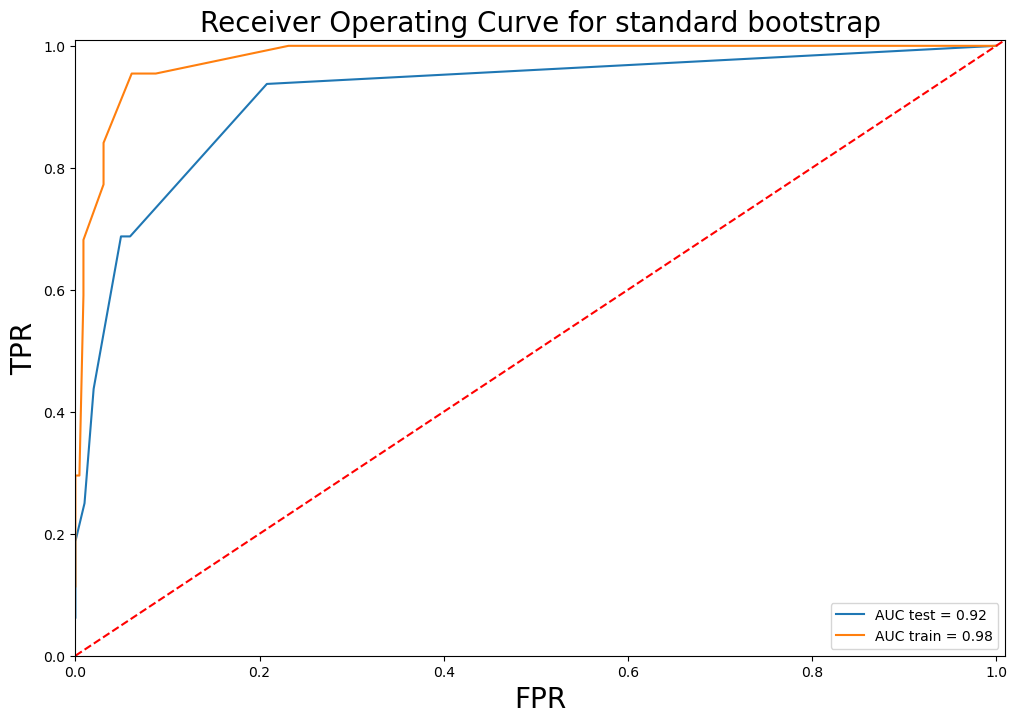

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.title(f"Receiver Operating Curve for standard bootstrap", size=20)

plt.plot(fpr_s, tpr_s, '-', label = f'AUC test = {auc_roc_s:0.2f}')
plt.plot(fpr_train_s, tpr_train_s, '-', label = f'AUC train = {auc_train_roc_s:0.2f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1.01], [0, 1.01],'r--')
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.ylabel('TPR', size=20)
plt.xlabel('FPR', size=20)
plt.show()

 Find the threshold which is closer to the point (1, 0) in terms of Euclidean distance. i.e. TPR close to one and FPR low as well 

In [140]:
quality = (np.array(tpr_s) - 1) ** 2 + np.array(fpr_s) ** 2 
min_ind = np.argmin(quality)
best_threshold_standard = th_s[min_ind]
best_threshold_standard

0.05263157894736842

In [141]:
# the TPR, FPR at this threshold
tpr_s[min_ind], fpr_s[min_ind]

(0.9375, 0.2079207920792079)

Plot precision recall curve for standard bootstrap

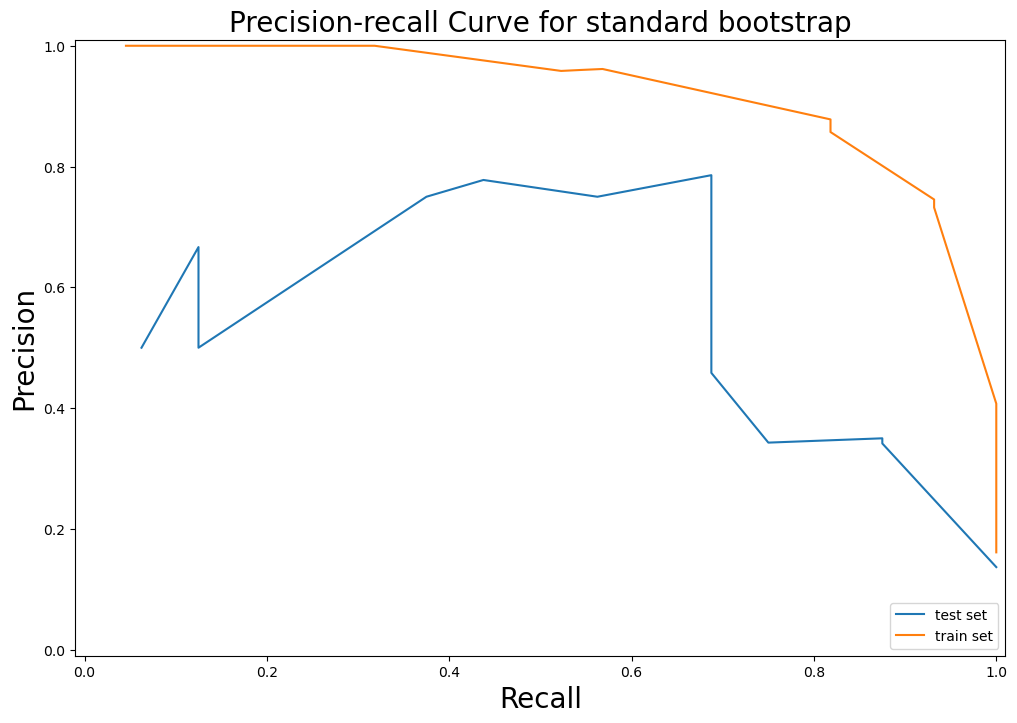

In [134]:
plt.figure(figsize=(12,8))
plt.title(f"Precision-recall Curve for standard bootstrap", size=20)

plt.plot(tpr_s, precision_s, '-', label = 'test set')
plt.plot(tpr_train_s, precision_train_s, '-', label = 'train set')
plt.legend(loc = 'lower right')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('Precision', size=20)
plt.xlabel('Recall', size=20)
plt.show()

Plot ROC on weighted bootstrap

In [114]:
n_features = np.floor(np.sqrt(X_train.shape[1]))
n_sample = np.floor(X_train.shape[0] / 5)
auc, tpr, fpr, precision, th = ROC(X_train, y_train, X_test, y_test, B_weighted, n_features, n_weighted, method="weighted")
auc_train, tpr_train, fpr_train, precision_train, _ = ROC(X_train, y_train, X_train, y_train, B_weighted, 
                                         n_features, n_weighted, method="weighted")

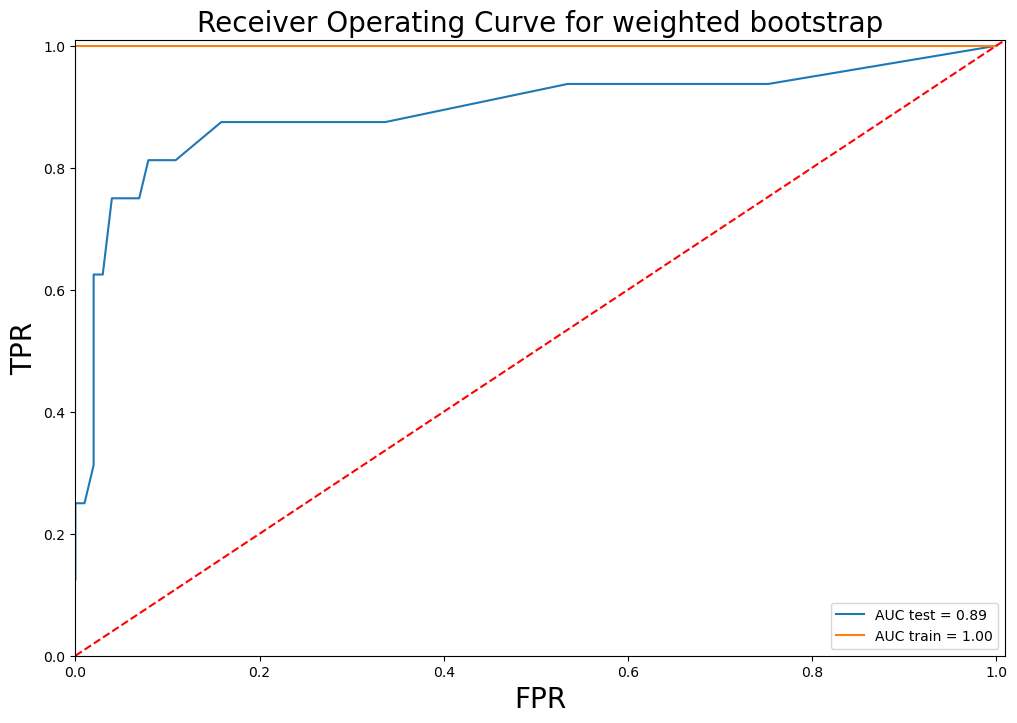

In [115]:
plt.figure(figsize=(12,8))
plt.title(f"Receiver Operating Curve for weighted bootstrap", size=20)
plt.plot(fpr, tpr, '-', label = f'AUC test = {auc:0.2f}')
plt.plot(fpr_train, tpr_train, '-', label = f'AUC train = {auc_train:0.2f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1.01], [0, 1.01],'r--')
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.ylabel('TPR', size=20)
plt.xlabel('FPR', size=20)
plt.show()

Find the threshold which is closer to the point (1, 0). i.e. TPR close to one and FPR low as well

In [131]:
quality = (np.array(tpr) - 1) ** 2 + np.array(fpr) ** 2 
min_ind = np.argmin(quality)
best_threshold_weighted = th[min_ind]
best_threshold_weighted

0.3157894736842105

In [132]:
# the TPR, FPR at this threshold
tpr[min_ind], fpr[min_ind]

(0.875, 0.15841584158415842)

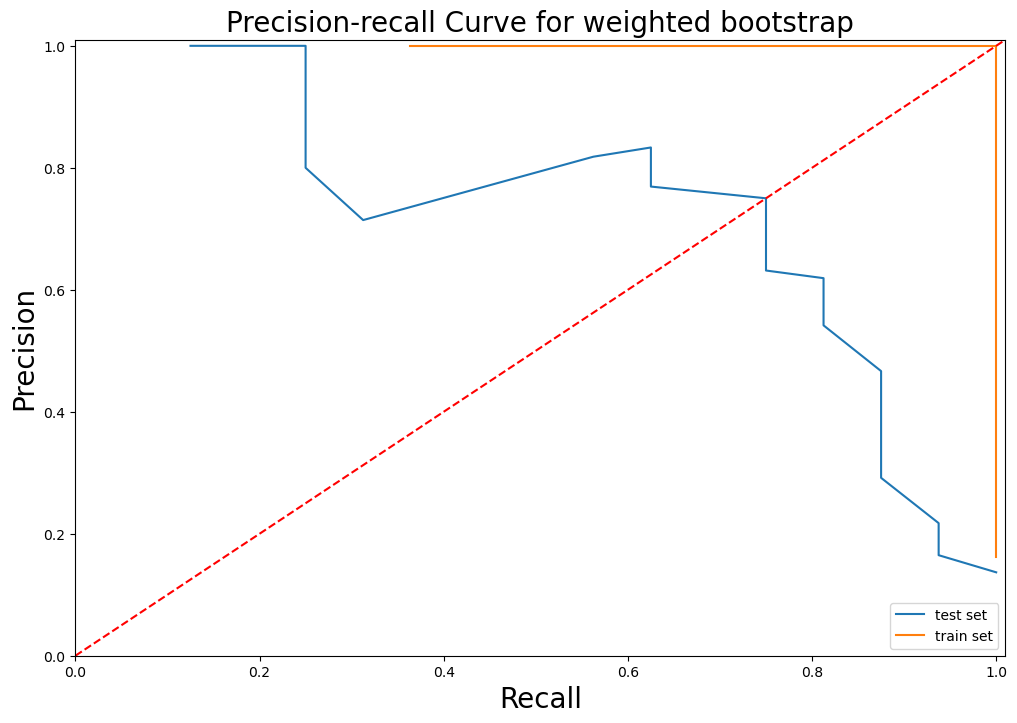

In [130]:
plt.figure(figsize=(12,8))
plt.title(f"Precision-recall Curve for weighted bootstrap", size=20)

plt.plot(tpr, precision, '-', label = 'test set')
plt.plot(tpr_train, precision_train, '-', label = f'train set')
plt.legend(loc = 'lower right')
plt.plot([0, 1.01], [0, 1.01],'r--')
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.ylabel('Precision', size=20)
plt.xlabel('Recall', size=20)
plt.show()

Surprisingly, the train set gives perfect precision-recall (i.e. precision = recall = 1) But we will focus on the test set which truely indicates generalisation ability of the model. 

Now we plot a comparison between standard bootstrap and weighted bootstrap for test set only

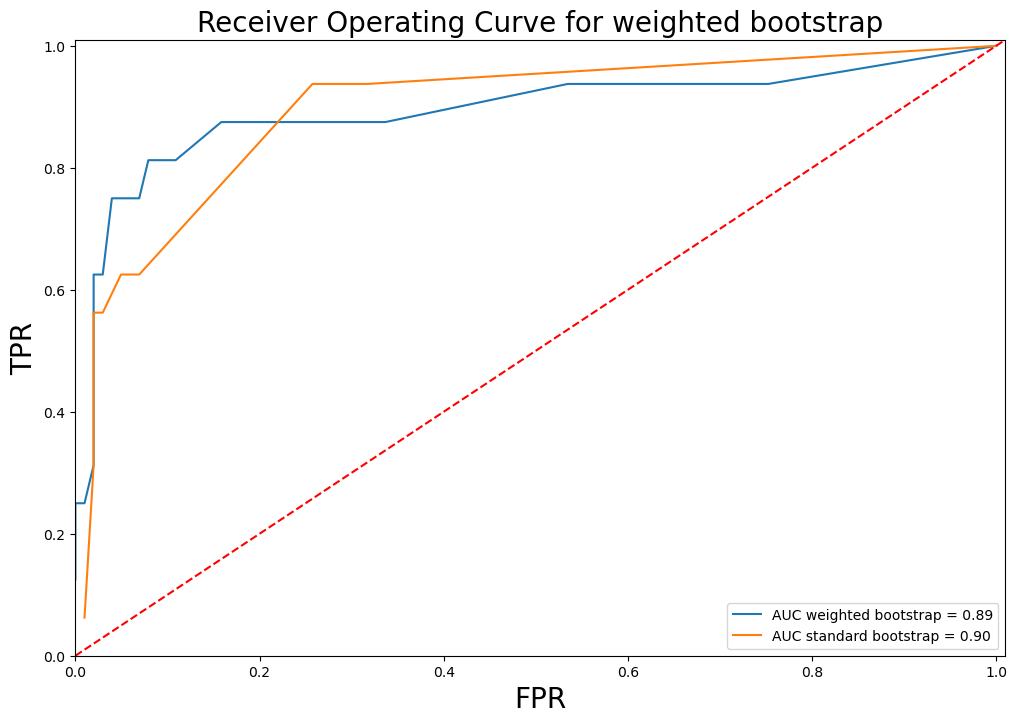

In [119]:
plt.figure(figsize=(12,8))
plt.title(f"Receiver Operating Curve for weighted bootstrap", size=20)
plt.plot(np.sort(fpr), np.sort(tpr), '-', label = f'AUC weighted bootstrap = {auc:0.2f}')
plt.plot(np.sort(fpr_s), np.sort(tpr_s), '-', label = f'AUC standard bootstrap = {auc_s:0.2f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1.01], [0, 1.01],'r--')
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.ylabel('TPR', size=20)
plt.xlabel('FPR', size=20)
plt.show()

AUC is roughly the same for standard and weighted bootstrap. standard bootstrap is capable of reaching a very high TPR (when the theshold is chosen to be a low value, 0.05 in this case), but its FPR is also higher than weighted bootstrap. 

FPR: 0.20 (standard), 0.158 (weighted) <br>
TPR: 0.9375 (standard), 0.875 (weighted) <br>

So if the goal is to recognise more of the positive cases (people with diabetes), the standard bootstrap should be used. But in contrast, if the goal is avoid classifying non-diabete patients as having diabete (control FPR), then the weighted bootstrap should be used

The following is comparison between precision-recall for standard and weighted bootstrap. It can be seen that the curve is closer to being perfect classifier (precision = recall = 1) than standard bootstrap. So in terms of precision adn recall, weighted bootstrap is a better strategy than the standard bootstrap

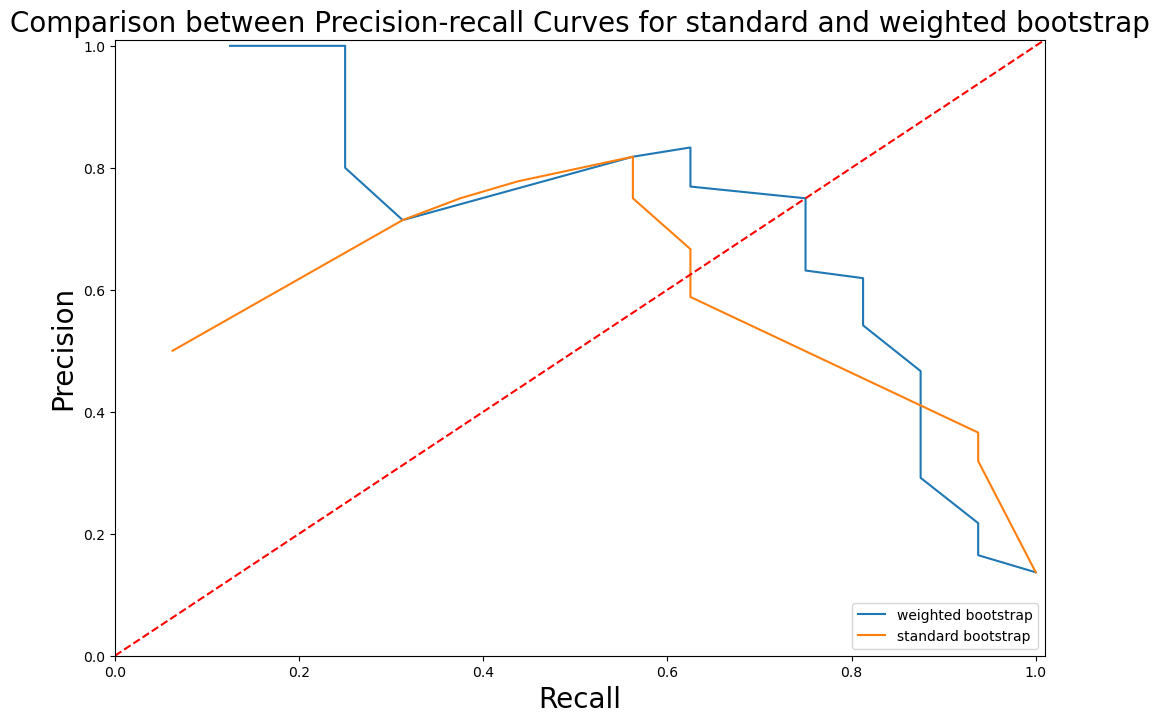

In [121]:
plt.figure(figsize=(12,8))
plt.title(f"Comparison between Precision-recall Curves for standard and weighted bootstrap", size=20)

plt.plot(tpr, precision, '-', label = 'weighted bootstrap')
plt.plot(tpr_s, precision_s, '-', label = 'standard bootstrap')
plt.legend(loc = 'lower right')
plt.plot([0, 1.01], [0, 1.01],'r--')
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.ylabel('Precision', size=20)
plt.xlabel('Recall', size=20)
plt.show()

#### 2.2	Support Vector Machine (SVM) (30 marks)

2.2.1

I will use the stochastic gradient descent method to minimise the loss function for soft-margin linear SVM. The randomness is added so that the model is not too dependent on the training set. Stochastic algorithm gives a more robust model. 

The gradient of loss function is:
$$\frac{\partial L}{\partial \boldsymbol{w}} = \boldsymbol w - \lambda \sum_{i \, : \, 1 - y^{(i)} (\boldsymbol{x}^{(i)} \cdot \boldsymbol{w}^{(i)} + b) \geq 0} \boldsymbol{x}^{(i)} y^{(i)}$$
$$\frac{\partial L}{\partial b} = - \lambda \sum_{i \, : \, 1 - y^{(i)} (\boldsymbol{x}^{(i)} \cdot \boldsymbol{w}^{(i)} + b) \geq 0} y^{(i)}$$

Then for each iteration, $\boldsymbol{w}$ is updated by 
$$\boldsymbol w = \boldsymbol w - \alpha \frac{\partial L}{\partial \boldsymbol w}$$
where $\alpha$ is the learning rate that will be tuned later. <br>

The stopping criteria is the difference between value of cost function between two iterations. So if 
$$| L_{i+1} - L_i | < \epsilon$$
(where $\epsilon$ is set to $0.01$ by default), then we stop the iterations. There is a maximum iteration number set to avoid overflow, it is 2000 by default. 

The prepare for SVM, add one column of all 1s to the matrix X so that the intercept $b$ will be optimised together with $\boldsymbol{w}$. 

In [1092]:
X_train_b = np.c_[X_train.to_numpy(), np.ones(X_train.shape[0]).reshape(-1, 1)]
X_test_b = np.c_[X_test.to_numpy(), np.ones(X_test.shape[0]).reshape(-1, 1)]

In [1093]:
y_train = y_train.to_numpy().astype(float)
y_test = y_test.to_numpy().astype(float)

Write a function that computes the loss function given in Q2.2.1

In [1094]:
def compute_cost(w, X, y, regul_strength):
    """
    Compute the hinge loss
    
    :param w: (p+1,) numpy array, weights and b
    :parma X: (n, p+1) numpy array, the augmented data matrix (containing intercept)
    :param y: (n,) numpy array, the labels
    :param regul_strength: float, the parameter lambda
    
    :return (float): hinge loss
    """
    
    n = X.shape[0]
    # find distance of each point from the hyperplane
    distances = 1 - y * (X.dot(w)) 
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge = regul_strength * distances.mean()

    # calculate cost
    # Note the last w represents intercept, so we should remove it 
    return 0.5 * np.dot(w[:-1], w[:-1]) + hinge

write a function that computes average gradient. <br>
Note that last entry of w corresponds to b, so when finding the gradient, the last entry is dealt individually

In [194]:
def calculate_cost_gradient(w, X_batch, y_batch, regul_strength=1e6):
    """
    Find the average gradient of hinge loss w.r.t. w for a batch of X, y
    
    :parma w: (p+1,) np array, weights and b
    :param X_batch: (k, p+1) np array, each row is a data
    :param y_batch: (k,) np array, labels of X_batch
    :param regul_strength: float, the parameter lambda, default 1e6
    
    :return gradient: (p+1,) np array, the average gradient of hinge loss among all batches
    """
    # if only one example is passed
    if type(y_batch) == np.float64:
        y_batch = np.asarray([y_batch])
        X_batch = np.asarray([X_batch])  # gives multidimensional array

    distance = 1 - (y_batch * (X_batch @ w))
    dw = np.zeros(len(w))

    for ind, d in enumerate(distance):
        if max(0, d)==0:
            di = w # derivative of first term
            di[-1] = 0 # because b is not in the first term
        else:
            di = w - (regul_strength * y_batch[ind] * X_batch[ind])
            di[-1] = - regul_strength * y_batch[ind]
        dw += di

    return dw/len(y_batch)  # average

The main codes for stochastic gradient descent are given below in `sgd`

In [1095]:
def sgd(X, y, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength=1e3, print_outcome=False):
    """
    Perform gradient descent on hinge loss
    
    :parma X: (n, p+1) numpy array, the augmented data matrix
    :param y: (n,) numpy array, the labels
    :param max_iterations: int, maximum iterations allowed
    :param stop_criterion: float, stop the algorithm when 
        the percentage change in cost between two iterations < stop_criterion
    :param learning_rate: the parameter alpha multiplied to gradient
    :param regul_strength: the parameter lambda, default 1e6
    :param print_outcome: boolean
        true: print 2^n th iteration cost for all n
        false: not print
    
    :return weights: the final solution w obtained by SGD
    """
  
    # initialise zero weights
    weights = np.zeros(X.shape[1])
    nth = 0
    # initialise starting cost as infinity
    # used to store cost of previous iteration, for checking stopping criteria 
    prev_cost = np.inf
  
    # stochastic gradient descent
    indices = np.arange(len(y))

    for iteration in range(1, max_iterations):
        # shuffle to prevent repeating update cycles
        np.random.shuffle(indices)
        X, y = X[indices], y[indices]
        
        for xi, yi in zip(X, y):
            # calculate the gradient dL/dw
            descent = calculate_cost_gradient(weights, xi, yi, regul_strength=regul_strength)
            weights = weights - (learning_rate * descent)

        # convergence check on every 2^n'th iteration
        if iteration==2**nth or iteration==max_iterations-1:
            # compute the cost(hinge loss)
            cost = compute_cost(weights, X, y, regul_strength=regul_strength)
            if print_outcome:
                print("Iteration is: {}, Cost is: {}".format(iteration, cost))
            # stop criterion
            if abs(prev_cost - cost) < stop_criterion * prev_cost:
                return weights
            
            prev_cost = cost
            nth += 1
  
    return weights

The `score` function calculates accuracy given prediction

In [1053]:
def score(w, X, y):
    """
    Find the score(accuracy) of perdiction
    score measures the percentage of correct perdictions
    
    :param w: (p+1,) numpy array, weights trained from sgd
    :parma X: (n, p+1) numpy array, the data matrix
    :param y: (n,) numpy array, the true labels
    
    :return (float): score
    """
    # find the perdictions
    y_preds = np.sign(X @ w)
    return np.mean(y_preds == y)

Write a cross-validation function for svm

In [1096]:
def cross_val_svm(X, y, num_folds, regul_strength):
    """
    Perform T-fold cross-validation on SGD algorithm for data X, y
    
    :param X: (N, p+1) np array, augmented data matrix
        assume the last column is y
    :param y: (N,) np array, the labels of X
    :param num_folds: number of folds for cross-validation
    :parma regul_strength: lambda for SVM
    
    :return w: (p+1,) np array, weights and b calculated using regul_strength given
    :return val_scores(list): scores on validation set for each fold 
    """
    folds = cross_val_split(X.shape[0], num_folds)

    train_scores = []
    val_scores = []
  
    for i in range(len(folds)):
        val_indices = folds[i]
        # define the training set: complement of validation set
        train_indices = list(set(range(X.shape[0])) - set(val_indices))

        X_train = X[train_indices, :]
        y_train = y[train_indices]
    
        # define the validation set
        X_val = X[val_indices, :]  
        y_val = y[val_indices]

        # train the model
        w = sgd(X_train, y_train, max_iterations=3000, stop_criterion=0.01, learning_rate=1e-5, regul_strength=regul_strength)

        # calculate scores and store them
        val_score = score(w, X_val, y_val)
        val_scores.append(val_score)

    return w, val_scores

Now perform 4-fold cross validation. Try `regul_strength` in $\{10^{-6}, 10^{-2}, \cdots, 10^{6}\}$. Because it is a coefficient, so we need to vary it exponentially to fully study the effect on optimisation

In [1101]:
# exponents
ls = [10 ** (exp) for exp in np.arange(-6, 7, dtype=float)]
# a list to store average accuracy scores (on validation set)
acc_l = []
ws = []

for l in ls:
    print(f"lambda = {l}")
    w, val_scores = cross_val_svm(X_train_b, y_train, 4, l)
    acc_l.append(np.mean(val_scores))
    ws.append(w)

lambda = 1e-06
lambda = 1e-05
lambda = 0.0001
lambda = 0.001
lambda = 0.01
lambda = 0.1
lambda = 1.0
lambda = 10.0
lambda = 100.0
lambda = 1000.0
lambda = 10000.0
lambda = 100000.0
lambda = 1000000.0


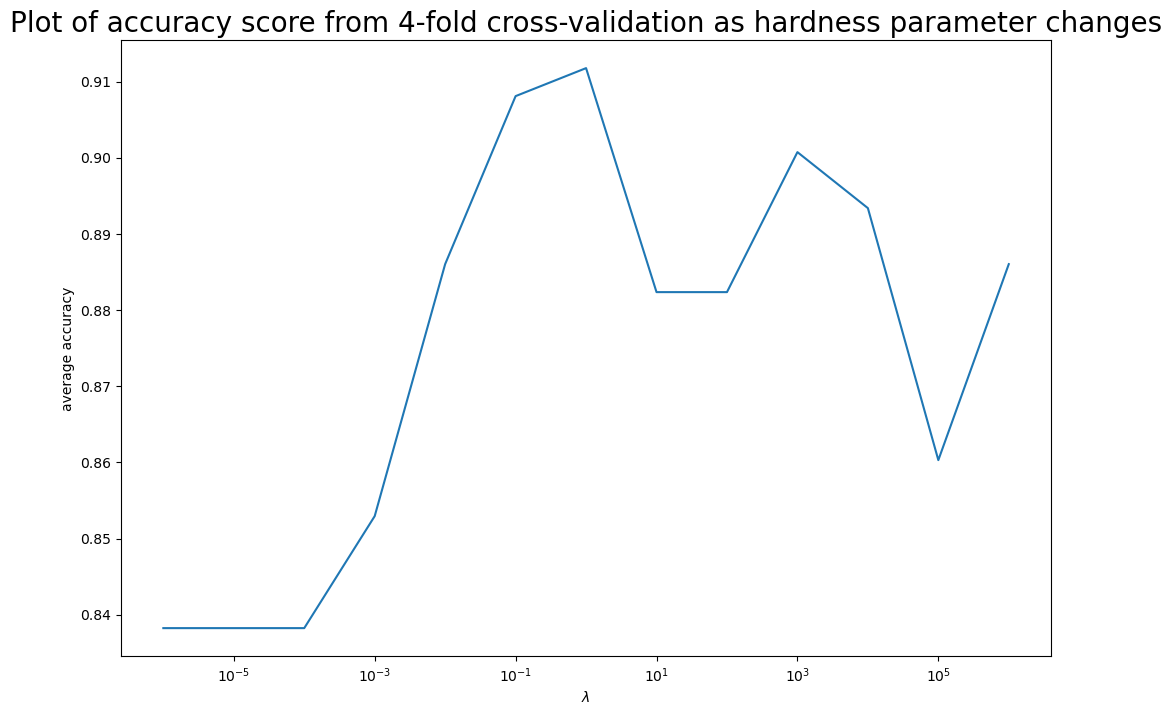

In [1102]:
plt.figure(figsize=(12,8))
plt.title(f"Plot of accuracy score from 4-fold cross-validation as hardness parameter changes", size=20)
plt.plot(ls, acc_l)
plt.xlabel(r"$\lambda$")
plt.ylabel("average accuracy")
plt.xscale('log')

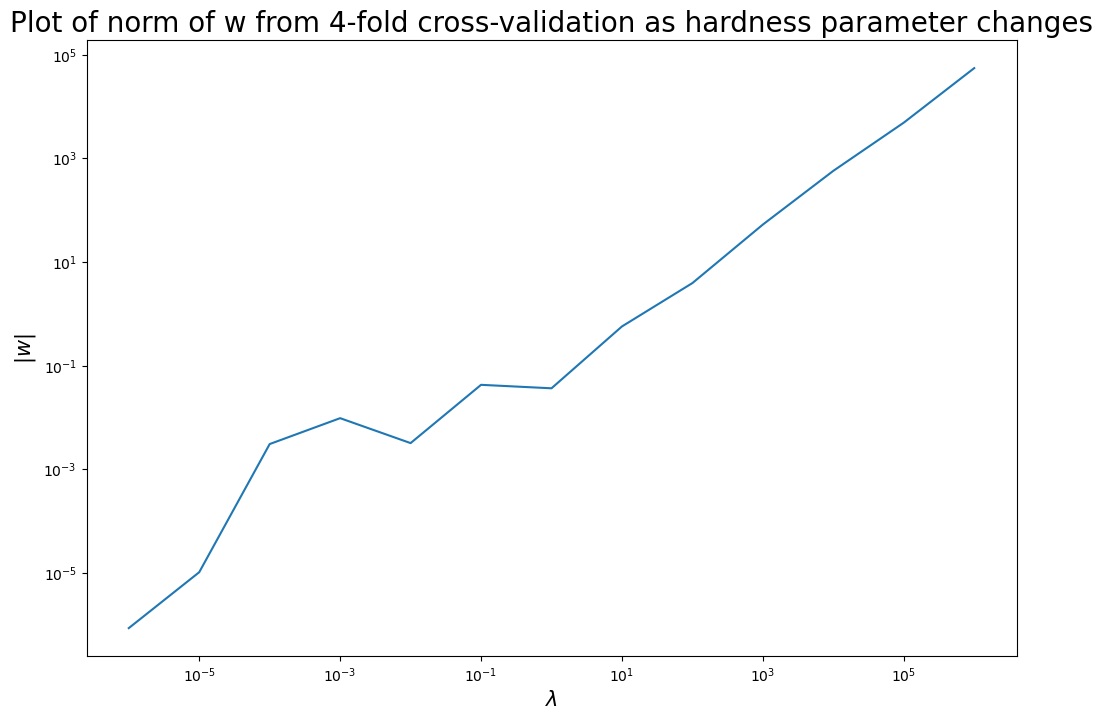

In [1103]:
norm_w = [np.linalg.norm(w[:-1]) for w in ws]  # note b is not included in the norm
plt.figure(figsize=(12,8))
plt.title(f"Plot of norm of w from 4-fold cross-validation as hardness parameter changes", size=20)
plt.plot(ls, norm_w)
plt.xlabel(r"$\lambda$", size=15)
plt.ylabel(r"$\|w\|$", size=15)
# plot log-log to make the change clearer
plt.xscale('log')
plt.yscale('log')

The accuracy is high for extremely low and high `regul_length` values. <br>

For high `regul_length`, this corresponds to hard margin, because the algorithm aims to make $1 - y^{(i)} (\boldsymbol{x}^{(i)} \cdot \boldsymbol{w} + b) \leq 0$, i.e.  $y^{(i)} (\boldsymbol{x}^{(i)} \cdot \boldsymbol{w} + b) \geq 1$, i.e. make every point be classified on the correct side of the plane. Due to possible errors in the data, this may not be achievable in all cases, and when the data is not perfectly linear-separable, this large $\lambda$ value causes SVM to put separation hyperplane on some points to avoid any wrong classificaiton. And so the algorithm is not robust to small changes in the training set. <br>

When `regul_length` is low, the algorithm focus more on minimising $\|\boldsymbol{w}\|$ and forgets about the classification mission. Imagine if $\lambda = 0$, then $\boldsymbol{w}^* = 0$, which makes no sense as $\boldsymbol{w}$ is normal to the separation surface. (this can also be seen from the plot of $\|\boldsymbol{w}\|$ against $\lambda$ chosen) <br>

So accuracy is low for either low or high hardness parameter. 

Perform a finer search on `regul_strength` around 1 to find the best value 

In [1104]:
# exponents
ls_fine = np.arange(0.5, 5.5, 0.5)
# a list to store average accuracy scores (on validation set)
acc_l_fine = []

for l in ls_fine:
    print(f"lambda = {l}")
    _, val_scores = cross_val_svm(X_train_b, y_train, 4, l)
    acc_l_fine.append(np.mean(val_scores))

lambda = 0.5
lambda = 1.0
lambda = 1.5
lambda = 2.0
lambda = 2.5
lambda = 3.0
lambda = 3.5
lambda = 4.0
lambda = 4.5
lambda = 5.0


In [1105]:
# pick the one with highest accuracy
ind = np.argmax(acc_l_fine)
best_lambda = ls_fine[ind]
best_lambda

3.0

2.2.2

The angle between hyperplanes is the same as angle between normal of hyperplanes, so the angle $\theta$ can be found by 
$$\cos{\theta} = \frac{v\cdot w}{\|v\| \|w\|}$$
where $v, w$ are normals to the hyperplanes. 

construct the matrix of $\cos{\theta}$

In [1106]:
mat_size = len(ls)

cos_mat = np.zeros((mat_size, mat_size))

for i in range(mat_size):
    for j in range(mat_size):
        # remove b from the vector
        v = ws[i][:-1] 
        w = ws[j][:-1]
        cos_mat[i, j] = np.inner(v, w) / (np.linalg.norm(v) * np.linalg.norm(w))

plot the heatmap

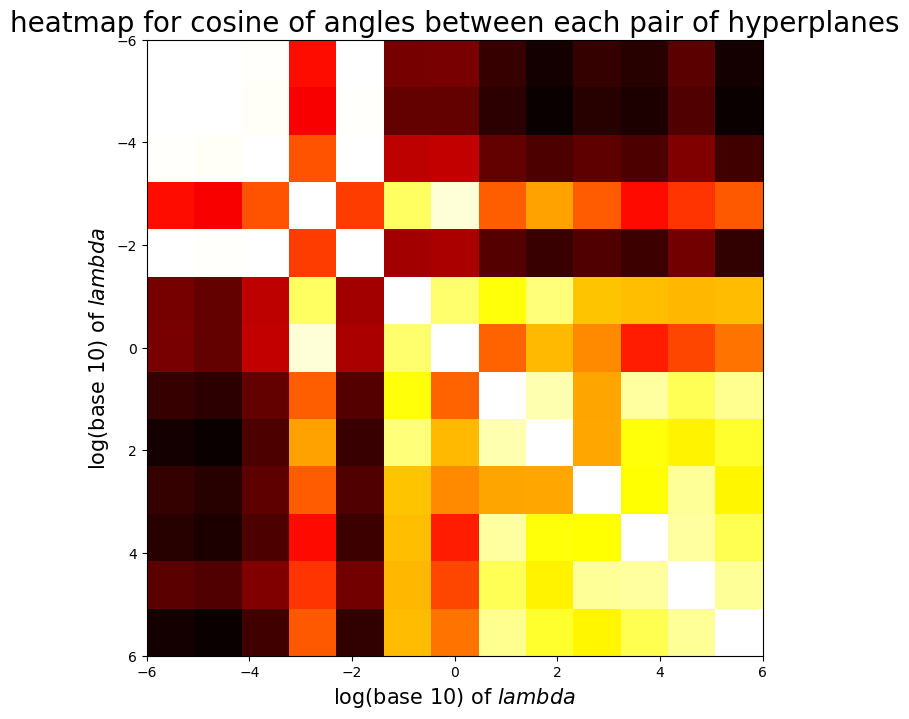

In [1113]:
plt.figure(figsize=(12,8))
plt.title("heatmap for cosine of angles between each pair of hyperplanes",size=20)
plt.imshow(cos_mat, cmap='hot', extent=[-6, 6, 6, -6])
plt.xlabel(r"log(base 10) of $lambda$",size=15)
plt.ylabel(r"log(base 10) of $lambda$",size=15)
plt.show()

From the plot we can see that the angle between hyperplanes obtained from different `lambda` is larger (i.e. $\cos{\theta}$ smaller) if the difference in `lambda` is larger. This means that `lambda` has a great effect on the orientation of the hyerplane obtained.

2.2.3

Train the model using best lambda $\lambda = 3$ found in 2.2.1, and find all the scores from confustion matrix to assess this model. 

In [1108]:
# train the model using best lambda found in 2.2.1
w = sgd(X_train_b, y_train, regul_strength=best_lambda)

# define prediction function
def pred_svm1(X):
    return np.sign(X @ w)

assess_classifier(pred_svm1, X_train_b, y_train, X_test_b, y_test)

Accuracy on training set: 0.9267399267399268
Accuracy on test set: 0.9316239316239316
TPR on training set: 0.6818181818181818
TPR on test set: 0.625
TNR on training set: 0.9737991266375546
TNR on test set: 0.9801980198019802
percision on training set: 0.8333333333333334
percision on test set: 0.8333333333333334
F-score on training set: 0.7499999999999999
F-score on test set: 0.7142857142857143


Each measure for the test set is not significantly lower than that of the training set, so we are safe from over-fitting. The F-score on test set is only around 0.71, which means overall performance of precision and recall is not very well. (Actually it is affected by the low recall value 0.625) The precision is relatively good, 0.83 means for each predicted diabetes patient have 83% confidence that the patient actually has diabetes. The accuracy level is satisfactory, over 90% of the predictions are correct. 

2.2.4

For this part, I will use the same idea as 2.2.1. Perform gradient descent to optimise loss function. But this time the gradient becomes:
when 
$$\frac{\partial L}{\partial \boldsymbol{u}} = K \boldsymbol{u} - \lambda \sum_{i \, : \, 1 - y^{(i)} (K^{(i)} u^{(i)} + b) \geq 0} K^{(i)} y^{(i)}$$
$$\frac{\partial L}{\partial b} = - \lambda \sum_{i \, : \, 1 - y^{(i)} (K^{(i)} u^{(i)} + b) \geq 0} y^{(i)}$$

We must first normalise x in order to use the sigmoid kernel

In [980]:
X_train_std = standardise(X_train.to_numpy())
X_test_std = (X_test - np.mean(X_train.to_numpy(), 0)) / np.std(X_train.to_numpy(), 0)

add the intercept (column of 1s)

In [981]:
X_train_std = np.c_[X_train_std, np.ones(X_train.shape[0]).reshape(-1, 1)]
X_test_std = np.c_[X_test_std, np.ones(X_test.shape[0]).reshape(-1, 1)]

to work on kernels, first define a kernel function that computes all pairs of kernels between two matrices

In [983]:
# First we need a function to calculate the kernel given the data #
def kernel_matrix(X1,X2,sigma):
    """
    find the sigmoid kernel matrix given data
    
    :param X1: (n1, m1) np array, each row corresponds to a data
    :param X2: (n2, m2) np array, each row corresponds to a data
    :param sigma: float, parameter of the Gaussian kernel
    
    :return kernel: (n1, n2) np array, the kernel matrix
        entry (i, j) is kernel between i'th data of X1 and j'th data of X2
    """

    n1,m1 = X1.shape
    n2,m2 = X2.shape
    if (m1 != m2):
        raise Exception("not compatible, second axis of X1, X2 must align")
    kernel = np.zeros((n1,n2))

    # Here we define a Gaussian Radial Basis Function Kernel #
    for i in range(n1):
        # broadcast used here
        kernel[i,:] = np.tanh(sigma * (X2 @ X1[i]) + 1)
        
    return kernel

Now define a new cost function usnig the kernel

In [984]:
def compute_cost_kernel(u, K, y, regul_strength=1e3,intercept=0):
    """
    Compute the hinge loss for Gaussian kernel
    
    :param u: (D,) numpy array, weights in the larger space R^D
    :parma K: (D, D) numpy array, the kernel matrix
    :param y: (D,) numpy array, the labels
    :param regul_strength: float, the parameter lambda, default 1e3
    :param intercept: the value of b in loss function
    
    :return (float): hinge loss
    """
    
    if u.shape[0] != K.shape[0]:
        raise Exception("shape of u and K not consistent")
    
    distances = 1 - y * (K @ u + intercept)
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge = regul_strength * distances.mean()

    # calculate cost
    return 0.5 * np.dot(u,K@u) + hinge

In [985]:
def calculate_cost_gradient_kernel(u, K_batch, y_batch, regul_strength=1e3,intercept=0):
    """
    Find the average gradient of hinge loss w.r.t. w for a batch of K, y
    with Gaussian kernel used
    
    :param u: (D,) numpy array, weights in the larger space R^D
    :param K_batch: (k, D) np array, each row is a data
    :param y_batch: (k,) np array, labels of X_batch
    :param regul_strength: float, the parameter lambda, default 1e6
    :parma intercept: the value of b
    
    :return gradient: (D,) np array, the average gradient w.r.t. u hinge loss among batches
    :return gradient_b (float): the average gradient w.r.t. b hinge loss among batches
    """

    # if only one example is passed, turn it into numpy array
    if type(y_batch) == np.float64 or type(y_batch) == np.int32:
        y_batch = np.asarray([y_batch])
        K_batch = np.asarray([K_batch]) 
    
    # find distance from u to hyperplane in R^D
    distance = 1 - y_batch * (K_batch @ u + intercept)
    dw = np.zeros(len(u))
    db = 0

    # find the gradient with hinge loss, work with one row of K at a time
    for ind, d in enumerate(distance):
        if max(0, d)==0:
            di = K_batch @ u
            di_b = 0    # gradient of b
        else:
            di = K_batch@u - regul_strength * K_batch[ind] * y_batch[ind]
            di_b = - regul_strength * y_batch[ind]
        dw += di
        db += di_b

    return dw/len(y_batch), db/len(y_batch)

Re-define the SGD using kernel. Again, the convergence criteria is the cost (the value of loss function) between two iterations, but the convergence criteria is changed to $0.001$ to give a better result, and the maximum iteration number is raised to $4000$ to ensure better convergence. (These are done because we are working in a higher dimension with the kernels) 

In [989]:
def sgd_kernel(K, y, batch_size=32, max_iterations=4000, stop_criterion=0.001, learning_rate=1e-4, regul_strength=1e3, print_outcome=False):
    """
    Perform stochastic gradient descent on hinge loss with Gaussian kernel
    
    :parma K: (D+1, D+1) numpy array, the kernel matrix
    :param y: (N,) numpy array, the labels
    :param batch_size: number of data points used for each iteration of SGD 
    :param max_iterations: int, maximum iterations allowed, default 4000
    :param stop_criterion: float, default 0.001,
        stop the algorithm when the percentage change in cost between two iterations < stop_criterion
    :param learning_rate: the parameter alpha multiplied to gradient, default 1e-4
    :param regul_strength: the parameter lambda, default 1e3
    :param print_outcome: boolean
        true: print 2^n th iteration cost for all n
        false: not print
    
    :return u: the solution obtained from SGD
    :return intercept: the solution b obtained from SGD
    """

    # initialise u and intercept, use all zeros
    u = np.zeros(K.shape[1])
    intercept=0
    
    nth = 0
    # initialise starting cost as infinity
    prev_cost = np.inf
    
    # perform stochastic gradient descent, each iteration using a batch of size batch_size
    indices = np.arange(len(y))
    for iteration in range(1, max_iterations):
        # shuffle to prevent repeating update cycles
        np.random.shuffle(indices)
        batch_idx = indices[:batch_size]
        K_b, y_b = K[batch_idx], y[batch_idx]
        for ki, yi in zip(K_b, y_b):
            # find the gradient (ascent direction)
            ascent, ascent_b = calculate_cost_gradient_kernel(u, ki, yi, regul_strength=regul_strength,intercept=intercept)
            u = u - (learning_rate * ascent)
            intercept -= learning_rate * ascent_b
        
        # convergence check on 2^n'th iteration
        if iteration==2**nth or iteration==max_iterations-1:
            # compute cost
            cost = compute_cost_kernel(u, K, y, regul_strength, intercept)
            if print_outcome:
                print("Iteration is: {}, Cost is: {}".format(iteration, cost))
            # stop criterion
            if abs(prev_cost - cost) < stop_criterion * prev_cost:
                return u, intercept
            
            prev_cost = cost
            nth += 1
    
    print("warning: maximum iteration reached")
    return u, intercept

Train the model using $\sigma = 0.01, 0.1, 1, 2$. 

In [1012]:
# store intercept
bs = []
# also record the us and Ks parameters for use in 2.2.5
us = []

for sigma in [0.01, 0.1, 1, 2]:
    
    print('For sigma = ' + str(sigma))
    # kernel matrix for training set
    K_train = kernel_matrix(X_train_std, X_train_std, sigma)

    u,b = sgd_kernel(K_train, y_train, batch_size=50, max_iterations=10000, stop_criterion=1e-5, learning_rate=1e-3, regul_strength=10)
    bs.append(b)
    us.append(u)

    def score(u, X, y, sigma, intercept):
        """
        Find the score(accuracy) of perdiction obtained from sgd_kernel
        
        :param u: (D,) numpy array, weights in the larger space R^D
        :parma X: (N, p) numpy array, the data matrix
        :param y: (N,) numpy array, the labels of X
        :param sigma: parameter of Gaussian kernel
        :param intercept: value of b
        
        :return (float): accuracy
        """
        
        # define the kernel containing test and train data
        K_test = kernel_matrix(X, X_train_std, sigma)
        
        ## The predicted value in the new space
        y_preds = np.sign(K_test @ u + intercept)
        
        return np.mean(y_preds == y) 

    print("Accuracy on training set: {}".format(score(u, X_train_std, y_train, sigma, b)))
    print("Accuracy on test set: {}".format(score(u, X_test_std, y_test, sigma, b)))
    
print(f"b values = {bs}")

For sigma = 0.01
Accuracy on training set: 0.9267399267399268
Accuracy on test set: 0.9316239316239316
For sigma = 0.1
Accuracy on training set: 0.9706959706959707
Accuracy on test set: 0.905982905982906
For sigma = 1
Accuracy on training set: 0.9853479853479854
Accuracy on test set: 0.7948717948717948
For sigma = 2
Accuracy on training set: 0.9633699633699634
Accuracy on test set: 0.8632478632478633
b values = [-1.9600000000000013, -4.3099999999999525, -117.19000000002305, -70.11999999999897]


From the accuracies, we can see that $\sigma = 00.1$ gives the highest accuracy on the test set. The intercept $b$ is unusually large for the $\sigma = 1, 2$ cases, which could indicate the model predicting wrong values

2.2.5

Four the four $\sigma$ values defined in 2.2.4, use the trained model using each $\sigma$ (obtained from 2.2.4) and get prediction on the test set. Then report the scores to compare performances. 

In [1014]:
sigma_l = [0.01, 0.1, 1, 2]

for i, sigma in enumerate(sigma_l):
    print("------------------")
    print(f"sigma={sigma}")
    K_test = kernel_matrix(X_test_std, X_train_std, sigma)
    y_preds = np.sign(K_test @ us[i] + bs[i])
    acc = np.mean(y_preds == y_test)
    print("Accuracy on test set: {}".format(acc))
    
    tp = np.sum(np.logical_and(y_preds == 1, y_test == 1))
    fp = np.sum(np.logical_and(y_preds == 1, y_test == -1))
    
    if tp == 0 and fp == 0:
        print("precision, F-score cannot be found, tp = fp = 0")
    else:
        precision = tp / (tp + fp)
        print("precision on test set: {}".format(precision))
    
        recall = tp / np.sum(y_preds == 1)
        F_score = 2 * precision * recall / (precision + recall)
    
        print("F-score on test set: {}".format(F_score))

------------------
sigma=0.01
Accuracy on test set: 0.9316239316239316
precision on test set: 0.8333333333333334
F-score on test set: 0.8333333333333334
------------------
sigma=0.1
Accuracy on test set: 0.905982905982906
precision on test set: 0.631578947368421
F-score on test set: 0.631578947368421
------------------
sigma=1
Accuracy on test set: 0.7948717948717948
precision on test set: 0.36666666666666664
F-score on test set: 0.36666666666666664
------------------
sigma=2
Accuracy on test set: 0.8632478632478633
precision on test set: 0.5
F-score on test set: 0.5


When $\sigma = 0.01$, the accuracy and precision are almost the same to the values in 2.2.3, but we have a great improvement in F-score (from 0.714 to 0.833) . For other $\sigma$ values, the performance of kernelised SVM is worse than standard kernel. So it could be that the original problem is already highly linearly-separable (this can also be seen in the scatter plot produced at the beginning of this question, for the `glucose` predictor there is a clear separation line between the two classes), raising it to higher dimension and using this kernel does not help improving the separability. But it is possible that some other `sigma` values gives better performance, so further investigation can be done. And other kernels can also be tested. 